# Neural Networks

## Team
<table align="left">
    <tr align="left"><th>Surname</th><th>Name</th><th>Student ID</th></tr>
    <tr><td>Gezekelian</td><td>Viken</td><td>03116112</td></tr>
    <tr><td>Tarasi</td><td>Stelina</td><td>03116442</td></tr>
    <tr><td>Tsagkarakis</td><td>Stylianos</td><td>03115180</td></tr>
</table>


# Small Dataset - S01

## Section A: Basic Information
(S01) Echocardiogram DataSet





### 1. Introduction




Το dataset που θα χρησιμοποιήσουμε αφορά το ηχοκαρδιογράφημα ασθενών που έχουν στο παρελθόν υποστεί καρδιακή προσβολή. Ένα μέρος τον ασθενών βρίσκεται εν ζωή ενώ οι υπόλοιποι όχι. Παρατηρώντας τις παραμέτρους επιβίωσης και εάν βρίσκονται ακόμη εν ζωή, ερευνήθηκε κατά πόσο ο ασθενής έζησε για ένα τουλάχιστον χρόνο μετά την καρδιακη προσβολη. 

Οι ερευνητές θέλησαν να προβλέψουν την πορεία των ασθενών στο μέλλον και πιο συγκεκριμένα το ενδεχόμενο επιβίωσης για τουλάχιστον ένα χρόνο μετά την καρδιακή προσβολή συνυπολοζίζοντας τις υπόλοιπες παραμέτρους των δεδομένων . 

Από το documentation βλέπουμε πως έχουμε ένα σύνολο 132 δειγμάτων με 12 χαρακτηριστικά, ενώ υπάρχουν τιμές που λείπουν. 


###2. Samples and features

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import ast
import io
import requests
import matplotlib.pyplot as plt

#Import data from our github
data_csv_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/nn2020-21/Assignment1/Small_Dataset/echocardiogram.data"
data = pd.read_csv(data_csv_url, error_bad_lines=False,header=None)

print("Succesful file processing!")
data

Succesful file processing!


b'Skipping line 50: expected 13 fields, saw 14\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [ ]:
print("Number of samples is",data.shape[0]  ,",number of features is",data.shape[1]-1,"and there is a label.")

Number of samples is 131 ,number of features is 12 and there is a label.


Οι τιμές της τελευταίας στήλης δείχνουν αν ο ασθενής επέζησε (τιμή 1) ή όχι (τιμή 0) για ένα χρόνο μετά το καρδιακό επεισόδιο.

Η εισαγωγή των δεδομένων αντιμετωπίζει πρόβλημα στην 50η σειρά όπου τα δεδομένα δεν είναι σωστά καταχωρημένα. Παρόλα αυτά, αυτό δε θα αποτελέσει πρόβλημα καθώς δε θα χρησιμοποιήσουμε δεδομένα που στη τελευταία στήλη έχουν "?".

Τα χαρακτηριστικά έχουν αριθμητική float μορφή, εκτός από το όνομα που δε θα χρησιμοποιήσουμε.



###3. Headers 

Το dataset δεν περιέχει επικεφαλίδες και για αυτό χρησιμοποιήσαμε την παράμετρο header = none ενώ δεν υπάρχει ούτε αρίθμηση.

###4. Labels

Οι ετικέτες βρίσκονται στην τελευταία στήλη και λαμβάνουν τις τιμές 0 (αν ο ασθενής απεβίωσε) και 1 (αν ο ασθενής επέζησε).

In [ ]:
labels = data.iloc[:,-1] #Labels are in last column(12)
feats  = data.iloc[:,:-1]
print (labels)


0      0
1      0
2      0
3      0
4      0
      ..
126    ?
127    ?
128    ?
129    ?
130    ?
Name: 12, Length: 131, dtype: object


###5.Text

Δεν πραγματοποιήσαμε κάποια αλλαγή στα αρχεία text, ωστόσο θα πραγματοποιήσουμε κάποιες αλλαγές στα δεδομένα κατά την ανάλυση τους καθώς τα δείγματα που έχουν ? στη τελευταία στήλη θα αφαιρεθούν. Ακόμα σύμφωνα με τις οδηγίες της άσκησης θα αφαιρεθούν οι στήλες 0,1,2,10,11 οι οποίες δίνουν πολύ υψηλές τιμές χωρίς να βελτιστοποιούν το αποτέλεσμα. 


###6. Missing Values

Υπάρχουν απουσιάζουσες τιμές οι οποίες παριστάνονται με "?". 

In [ ]:
misv = sum(feats == '?') + sum(labels == '?') #sum of ? values without line 50 


print("Total missing values (without line 50):", misv,'\n')


Total missing values (without line 50): 123 



Τώρα θα κάνουμε μετατροπές στο dataset όπως αναφέρονται στο FAQ της άσκησης αφαιρώντας τα δείγματα που στη τελευταία στήλη του label έχουν τις τιμές ?, καθώς και τις στήλες που δε χρειάζονται, παίρνοντας τα νέα ποσοστά.

In [ ]:
data = data[data[12] != '?']# remove samples with no label
data = data.drop(columns=[0,1,9,10,11]) #remove columns from faq

labels = data.iloc[:,-1] #new labels
feats  = data.iloc[:,:-1] #new feats
features_v= feats.values
features = features_v.T[:,:]

one_missing = sum(sum(features == '?')!=0)
print("Now we have",one_missing,"samples that they dont have at least one value out of",data.shape[0],"so :",one_missing/data.shape[0]*100,"%")

Now we have 12 samples that they dont have at least one value out of 74 so : 16.216216216216218 %


###7. Balance

'Εχουμε δύο κατηγορίες, 0 και 1 ,συνεπώς προκύπτει εύκολα η συχνότητα τους.

In [ ]:
labels = labels.astype(int)
alive = sum(labels)
dead = data.shape[0]-alive
per_alive = alive/data.shape[0]*100
per_dead = dead/data.shape[0]*100
print("Number of alive persons (1) :",alive,"(",per_alive,"%)","\n")
print("Number of persons that have died (0) :", dead,"(",per_dead,"%)","\n")


Number of alive persons (1) : 24 ( 32.432432432432435 %) 

Number of persons that have died (0) : 50 ( 67.56756756756756 %) 



Βλέπουμε πως το dataset δεν είναι ισορροπημένο καθώς οι τιμές για το 0 είναι περισσότερες ξεπερνώντας την αναλογία 1.5. Για αυτό το λόγο στη συνέχεια θα κάνουμε oversampling ώστε να διορθώσουμε αυτή τη διαφορά και να πάρουμε πιο έγκυρα αποτελέσματα.

###8.Train and Test

Σε αυτό το σημείο θα χωρίσουμε τα δεδομένα μας σε train και test και αντίστοιχα τα labels . 


In [ ]:
from sklearn.model_selection import train_test_split

feats= np.where(feats=='?',-1,feats)
x_train,x_test,y_train,y_test = train_test_split(feats,labels,test_size=0.2)  #y_train, y_test:labels

In [ ]:
from sklearn.impute import SimpleImputer

np.set_printoptions(suppress=True)

si = SimpleImputer(missing_values=-1,strategy='mean')
x_train = si.fit_transform(x_train)
x_test  = si.fit_transform(x_test)

## Section B: Baseline classification

Σε αυτό το σημείο θα χρησιμοποιήσουμε τους Dummy, Gaussian Naive Bayes και kΝΝ ταξινομητές παρατηρώντας την απόδοση τους.

### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
import time

def DummyClassification(x_train,y_train,x_test,y_test):
    
    scores, predictions, fit_times, pred_times = {}, {}, {}, {}

    dc_uniform  = DummyClassifier(strategy="uniform")
    dc_const_0  = DummyClassifier(strategy="constant",constant=0)
    dc_const_1  = DummyClassifier(strategy="constant",constant=1)
    dc_stratif  = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")

    #Fit
  
    start_time = time.time()
    dc_uniform.fit(x_train, y_train)
    fit_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_0.fit(x_train, y_train)
    fit_times['const_0'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_1.fit(x_train, y_train)
    fit_times['const_1'] = time.time()-start_time
    
    start_time = time.time()
    dc_stratif.fit(x_train, y_train)
    fit_times['stratif'] = time.time()-start_time
    
    start_time = time.time()
    dc_frequent.fit(x_train,y_train)
    fit_times['frequent'] = time.time()-start_time
    
    #Predict
    
    start_time = time.time()
    predictions['uniform']  = dc_uniform.predict(x_test)
    pred_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_0']  = dc_const_0.predict(x_test)
    pred_times['const_0'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_1']  = dc_const_1.predict(x_test)
    pred_times['const_1'] = time.time()-start_time
    
    start_time = time.time()
    predictions['stratif']  = dc_stratif.predict(x_test)
    pred_times['stratif'] = time.time()-start_time
    
    start_time = time.time()
    predictions['frequent'] = dc_frequent.predict(x_test)
    pred_times['frequent'] = time.time()-start_time

    #Score
    
    scores['uniform']  = dc_uniform.score(x_test, y_test)
    scores['const_0']  = dc_const_0.score(x_test, y_test)
    scores['const_1']  = dc_const_1.score(x_test, y_test)
    scores['stratif']  = dc_stratif.score(x_test, y_test)
    scores['frequent'] = dc_frequent.score(x_test,y_test)
    
    return predictions, scores,fit_times, pred_times

In [ ]:
predictions, accuracies,_,_ = DummyClassification(x_train,y_train,x_test,y_test)

for i in predictions:
    print("Prediction for", i, ':', predictions[i])

print()

print("Classification Accuracy on our Dataset : \n")

sorted_accuracy = [(k, accuracies[k]) for k in sorted(accuracies, key=accuracies.get, reverse=True)]
for k,v in sorted_accuracy:
    print(k,v)

Prediction for uniform : [0 0 1 1 0 1 1 1 1 1 1 1 0 0 1]
Prediction for const_0 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction for const_1 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Prediction for stratif : [0 0 0 1 0 0 0 1 1 0 0 0 1 0 1]
Prediction for frequent : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Classification Accuracy on our Dataset : 

const_0 0.6
frequent 0.6
uniform 0.5333333333333333
stratif 0.4666666666666667
const_1 0.4


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
print("Confusion matrices :\n")
for i in predictions:
    cnf_matrix = confusion_matrix(y_test, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')

Confusion matrices :

uniform
[[1 8]
 [4 2]]

const_0
[[9 0]
 [6 0]]

const_1
[[0 9]
 [0 6]]

stratif
[[5 4]
 [5 1]]

frequent
[[9 0]
 [6 0]]



In [ ]:
from sklearn.metrics import classification_report
for strategy in predictions:
    print("\nClassification Report of",strategy,"strategy:\n",classification_report(y_test,predictions[strategy]))


Classification Report of uniform strategy:
               precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.20      0.33      0.25         6

    accuracy                           0.20        15
   macro avg       0.20      0.22      0.20        15
weighted avg       0.20      0.20      0.19        15


Classification Report of const_0 strategy:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       0.00      0.00      0.00         6

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.37        15
weighted avg       0.36      0.60      0.45        15


Classification Report of const_1 strategy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.40      1.00      0.57         6

    accuracy                           0.40    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model = gnb.fit(x_train, y_train)

predictions['GNB']=model.predict(x_test)

accuracies['GNB'] = gnb.score(x_test, y_test)

print("Classification Accuracy\n")

print(accuracies['GNB'])

Classification Accuracy

0.8


In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions['GNB'])
print("Gaussian")
print(cnf_matrix, end='\n\n')

Gaussian
[[8 1]
 [2 4]]



In [ ]:
print("\nClassification Report of Gaussian :\n",classification_report(y_test,predictions['GNB']))


Classification Report of Gaussian :
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15



### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(x_train,y_train)
predictions['knn'] = knn.predict(x_test)
accuracies['knn'] = knn.score(x_test,y_test)

print("Classification Accuracy of 1-NN:",accuracies['knn'])

Classification Accuracy of 1-NN: 0.7333333333333333


In [ ]:
print("Confusion Matrix of 1-NN:\n",confusion_matrix(y_test,predictions['knn']))

Confusion Matrix of 1-NN:
 [[8 1]
 [3 3]]


In [ ]:
print("Classification Report of 1-NN:\n",classification_report(y_test,predictions['knn']))

Classification Report of 1-NN:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.75      0.50      0.60         6

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15



### Plots

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,f1_score
f1_macros, f1_micros = [],[]

for pl in predictions:  
    f1_micros.append(f1_score(y_test,predictions[pl],average='micro'))
    f1_macros.append(f1_score(y_test,predictions[pl],average='macro'))

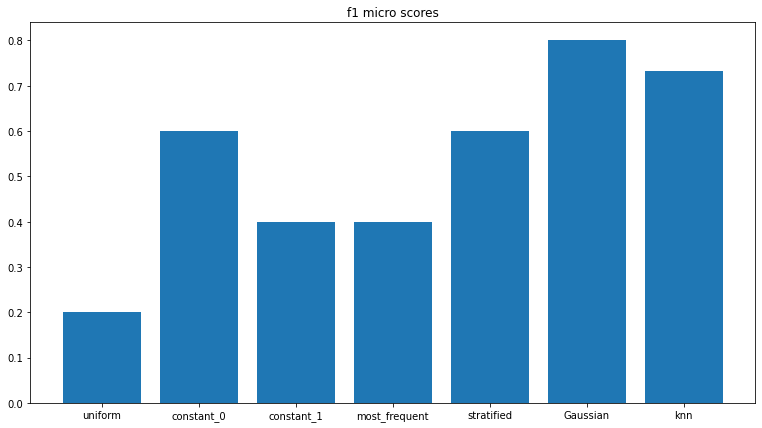

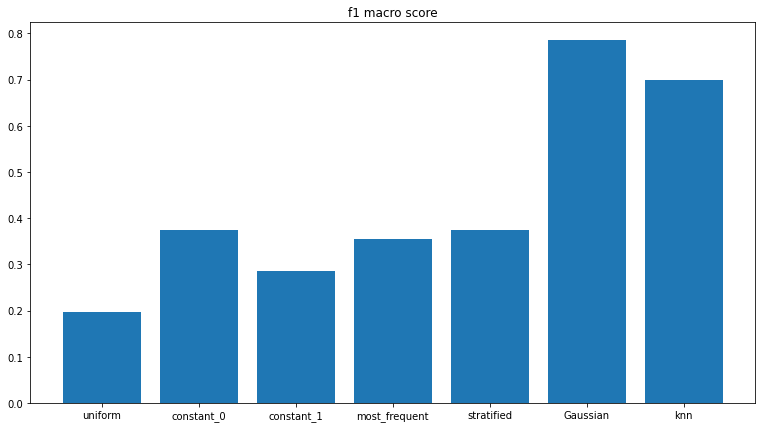

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified', 'Gaussian','knn']
ax.bar(classifiers, f1_micros, width=0.8)
ax.set_title('f1 micro scores')

fig, ax = plt.subplots(figsize=(13,7))
ax.bar(classifiers, f1_macros, width=0.8)
ax.set_title('f1 macro score')

plt.show()

Μετά από πολλαπλές επαναλλήψεις του κώδικα είδαμε μεγάλες διαφορές στα αποτελέσματα το οποίο μας οδηγεί στο συμπέρασμα πως ο τρόπος που χωρίστηκε το training και το test set παίζει μεγάλο ρόλο. Αυτό συμβαίνει καθώς έχουμε πολύ λίγα δείγματα λόγω της έλλειψης τιμών ("?") στην στήλη των labels.



*   Για τους Dummy Classifiers παρατηρούμε πως μεγαλύτερες διακυμάνσεις στα τελικά αποτελέσματα έχει ο uniform το οποίο είναι αναμενόμενο καθώς προβλέπει τυχαία. Για τους βλέπουμε πως θέτοντας την τιμή 0 έχουμε καλύτερα αποτελέσματα, γεγονός που περιμέναμε αφού αποτελεί και το μεγαλύτερο μέέρος των δειγμάτων. 
*  Ο Gaussian Naive Bayes βλέπουμε να σημειώνει τα καλύτερα αποτελέσματα και στη συνέχεια ο Knn καθώς βασίζονται σε αλγόριθμους λογικής ανάλυσης δεδομένων.

Συγκρίνοντας τα δύο διαγράμματα παρατηρούε πως η τιμή F1 micro είναι σταθερά μεγαλύτερη σε όλες τις περιπτώσεις. 






## Section C: Optimization

### Pre-processing of Data set

Στην αρχή, θα χρησιμοποιήσουμε την τεχνική του κατωφλίου διακύμανσης (Variance threshold) η οποία βασίζεται στο ότι αν ένα χαρακτηριστικό έχει χαμηλή διακύμανση δεν βοηθάει σημαντικά στην ορθή ταξινόμηση. Συνεπώς, θα χρησιμοποιήσουμε την συνάρτηση VarianceThreshold() για την αφαίρεση των χαρακτηριστικών με διακύμανση χαμηλότερη του κατωφλίου.


Στη συνέχεια θα κάνουμε κανονικοποίηση των χαρακτηριστικών ώστε να αποφύγουμε χαρακτηριστικά με πολύ μεγάλες διαφορές στις τιμές τους καθώς μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση.

Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές και γίνεται με 2 τρόπους: Διαιρώντας με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το standard score του κάθε χαρακτηριστικού, που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα.


In [ ]:
from imblearn.over_sampling import RandomOverSampler

randomOS = RandomOverSampler(random_state = 0)
x_train_r, y_train_r = randomOS.fit_sample(x_train,y_train)
new_balance = sum(y_train_r == 0)/sum(y_train_r==1)
print("The new balance is :",new_balance,'\n') 

The new balance is : 1.0 



Βλέπουμε πως πλέον η αναλογία τιμών 0 και 1 είναι  1 και συνεπώς το training set είναι ισορροπημένο. Το Oversamping έγινε μόνο στο training set, αφού το test set θέλουμε να μείνει αναλοίωτο.

### Dummy Classifiers

Οι Dummy Classifiers δεν μπορούν να βελτιωθούν παρόλα αυτά παραθέτουμε παρακάτω τα πλήρη στοιχεία μετά το Oversampling, βλέποντας και στο τέλος πως δεν υπήρξε ουσιαστική βελτιστοποίηση. 

In [ ]:
new_predictions, new_accuracies, fit_times, pred_times = DummyClassification(x_train_r,y_train_r,x_test,y_test)

print("Classification Accuracy of Dummy Classifiers:\n")
sorted_new_accuracy = [(k, new_accuracies[k]) for k in sorted(new_accuracies, key=new_accuracies.get, reverse=True)]
for k,v in sorted_new_accuracy:
    print(k,v)

print("\nConfusion Matrices of Dummy Classifiers:\n")
for strategy in new_predictions: print("Stratehy",strategy,":\n",confusion_matrix(y_test,new_predictions[strategy]))

for strategy in new_predictions:
    print("\nf1-micro average for",strategy,":",f1_score(y_test,new_predictions[strategy], average='micro'))
    print("f1-macro average for",strategy,":",f1_score(y_test,new_predictions[strategy], average='macro'))
    
print("\nTime for Fit and Predict of Dummy Classifiers :\n")
for strategy in fit_times:
    print("Fitting time for",strategy,":",fit_times[strategy])
    print("Predict time for",strategy,":",pred_times[strategy],"\n")

Classification Accuracy of Dummy Classifiers:

uniform 0.8
const_0 0.6
frequent 0.6
const_1 0.4
stratif 0.3333333333333333

Confusion Matrices of Dummy Classifiers:

Stratehy uniform :
 [[6 3]
 [1 5]]
Stratehy const_0 :
 [[9 0]
 [6 0]]
Stratehy const_1 :
 [[0 9]
 [0 6]]
Stratehy stratif :
 [[4 5]
 [3 3]]
Stratehy frequent :
 [[9 0]
 [6 0]]

f1-micro average for uniform : 0.7333333333333333
f1-macro average for uniform : 0.7321428571428572

f1-micro average for const_0 : 0.6
f1-macro average for const_0 : 0.37499999999999994

f1-micro average for const_1 : 0.4000000000000001
f1-macro average for const_1 : 0.28571428571428575

f1-micro average for stratif : 0.4666666666666667
f1-macro average for stratif : 0.4642857142857143

f1-micro average for frequent : 0.6
f1-macro average for frequent : 0.37499999999999994

Time for Fit and Predict of Dummy Classifiers :

Fitting time for uniform : 0.0005538463592529297
Predict time for uniform : 0.00021457672119140625 

Fitting time for const_0 : 

### Optimize Knn 

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
mscaler = MinMaxScaler()
ros = RandomOverSampler()
sscaler = StandardScaler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('kNN', clf)])

Στη συνέχεια για την  θα χρησιμποιήσουμε την GridSearchCV για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας η οποία κάνει μαζί cross-validation και grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
#Υπερπαράμετροι προς βελτιστοποίηση kNN: n_neighbors

vthreshold = [0, 0.5, 49, 53] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = np.arange(1,10,1)
k = np.arange(1,50,5) # η υπερπαράμετρος του ταξινομητή


In [ ]:
#Dokimazontas me ola ta pre-processing

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-micro average of Knn Classifier: 0.8000000000000002

f1-macro average of Knn Classifier: 0.784688995215311


Confusion Matrix of Knn:
 [[8 1]
 [2 4]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=1)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=46))])
{'kNN__n_neighbors': 46, 'pca__n_components': 1, 'selector__threshold': 0}


In [ ]:
#dokimazontas xwris pca 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)



f1-micro average of Knn Classifier: 0.8666666666666667

f1-macro average of Knn Classifier: 0.8611111111111112


Confusion Matrix of Knn:
 [[8 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=41))])
{'kNN__n_neighbors': 41, 'selector__threshold': 0}


In [ ]:
#Without scaler and pca

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)




f1-micro average of Knn Classifier: 0.8000000000000002

f1-macro average of Knn Classifier: 0.784688995215311


Confusion Matrix of Knn:
 [[8 1]
 [2 4]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=41))])
{'kNN__n_neighbors': 41, 'selector__threshold': 0}


In [ ]:
#vlepoyme pws exoyme kalytera apotelesmata xwris pca kai me scaler 
#twra tha dokimasoyme xwris sampler


pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-micro average of Knn Classifier: 0.7333333333333333

f1-macro average of Knn Classifier: 0.6590909090909091


Confusion Matrix of Knn:
 [[9 0]
 [4 2]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.33      0.50         6

    accuracy                           0.73        15
   macro avg       0.85      0.67      0.66        15
weighted avg       0.82      0.73      0.69        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=6))])
{'kNN__n_neighbors': 6, 'selector__threshold': 0.5}


Παρατηρούμε πως καλύτερη απόδοση είχαμε στην περίπτωση pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('kNN', clf)]) στην οποια θα αναζητησουμε και τις καλύτερες μεταβλητές.

In [ ]:
vthreshold = [0] 
k = np.arange(17,26,1)

pipe = Pipeline(steps=[ ('selector',selector),('scaler',sscaler),('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict( selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-micro average of Knn Classifier: 0.8666666666666667

f1-macro average of Knn Classifier: 0.8500000000000001


Confusion Matrix of Knn:
 [[9 0]
 [2 4]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=22))])
{'kNN__n_neighbors': 22, 'selector__threshold': 0}


Οι παραπάνω τιμές για τις μεταβλητές μας επιλέχθηκαν ύστερα από αναζήτηση σε αρχικά μεγάλο διάστημα τιμών και στη συνέχεια περιορισμό του.
Έχοντας βρει τις βέλτιστες τιμές θα προχωρήσουμε στην εκπαίδευση του ταξινομητή.

In [ ]:
#Fit

pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=22))])
{'kNN__n_neighbors': 22, 'selector__threshold': 0}

start_time = time.time()
pipe.fit(x_train,y_train)
fit_times['knn'] = time.time()-start_time

start_time = time.time()
new_predictions['knn'] = pipe.predict(x_test)
pred_times['knn'] = time.time()-start_time

new_accuracies['knn'] = pipe.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print("\nClassification Report of Knn:\n",classification_report(y_test,new_predictions['knn']))
print("\nFit time:\n",fit_times['knn'])
print("\nPrediction time:\n",pred_times['knn'],"\n")




f1-micro average of Knn Classifier: 0.8666666666666667

f1-macro average of Knn Classifier: 0.8500000000000001


Confusion Matrix of Knn:
 [[9 0]
 [2 4]]

Classification Report of Knn:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15


Fit time:
 0.0031828880310058594

Prediction time:
 0.10330748558044434 



### Optimize GNB

Για τον Gaussian Naive Bayes δεν έχουμε υπερπαραμέτρους να βελτιστοποιήσουμε, παρόλα αυτά θα χρησιμοποιήσουμε cross validation για να βρούμε τις κατάλληλες παραμετρους του που τον βελτιστοποιούν.

In [ ]:
#Arxika tha doyme kai me ta 4 processing
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() 

vthreshold = [0, 0.5, 0.9, 1] 
n_components = np.arange(1,10,1) #gia pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8666666666666667

f1-macro average of GNB Classifier: 0.8611111111111112


Confusion Matrix of Gaussian NB:
 [[8 1]
 [1 5]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=2)), ('gnb', GaussianNB())])
{'pca__n_components': 2, 'selector__threshold': 1}


In [ ]:
#Without pca 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros),  ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.784688995215311


Confusion Matrix of Gaussian NB:
 [[8 1]
 [2 4]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.9)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('gnb', GaussianNB())])
{'selector__threshold': 0.9}


In [ ]:
#With pca, without scaler

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.7963800904977376


Confusion Matrix of Gaussian NB:
 [[7 2]
 [1 5]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.71      0.83      0.77         6

    accuracy                           0.80        15
   macro avg       0.79      0.81      0.80        15
weighted avg       0.81      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=3)),
                ('gnb', GaussianNB())])
{'pca__n_components': 3, 'selector__threshold': 0}


In [ ]:
#without sampler

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.7333333333333333

f1-macro average of GNB Classifier: 0.7


Confusion Matrix of Gaussian NB:
 [[8 1]
 [3 3]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.75      0.50      0.60         6

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('gnb', GaussianNB())])
{'pca__n_components': 1, 'selector__threshold': 0}


Βλέπουμε πως η καλύτερη αρχιτεκτονική είναι pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)]). Στη συνέχεια θα μελετήσουμε την τιμή των μεταβλητών.

In [ ]:
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() 

vthreshold = [0.5,1] 
n_components = np.arange(1,3,1) #gia pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.784688995215311


Confusion Matrix of Gaussian NB:
 [[8 1]
 [2 4]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=2)), ('gnb', GaussianNB())])
{'pca__n_components': 2, 'selector__threshold': 1}


In [ ]:
#Final fit

pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=1)), ('gnb', GaussianNB())])
{'pca__n_components': 1, 'selector__threshold': 1}

start_time = time.time()
pipe.fit(x_train,y_train)
fit_times['GNB'] = time.time()-start_time

start_time = time.time()
new_predictions['GNB'] = pipe.predict(x_test)
pred_times['GNB'] = time.time()-start_time

new_accuracies['GNB'] = pipe.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of GNB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of GNB:\n",classification_report(y_test,new_predictions['GNB']))
print("\nFit time:\n",fit_times['GNB'])
print("\nPrediction time:\n",pred_times['GNB'],"\n")








f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.7619047619047619


Confusion Matrix of GNB:
 [[9 0]
 [3 3]]

Classification Report of GNB:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.50      0.67         6

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15


Fit time:
 0.0041234493255615234

Prediction time:
 0.0006663799285888672 



### Plot for F1

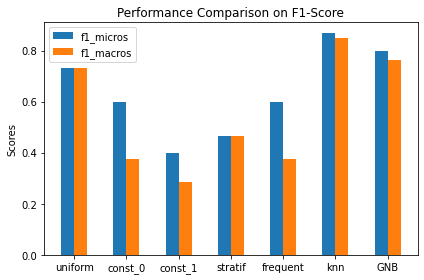

In [ ]:
f1_macros, f1_micros, labels = [],[],[]
for clf in new_predictions:  
    f1_micros.append(f1_score(y_test,new_predictions[clf],average='micro'))
    f1_macros.append(f1_score(y_test,new_predictions[clf],average='macro'))
    labels.append(clf)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_micros, width, label='f1_micros')
rects2 = ax.bar(x + width/2, f1_macros, width, label='f1_macros')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()



### Compare Accuracies before/after optimization

In [ ]:
perf = pd.DataFrame(columns=['f1-micro before', 'f1-micro after', 'f1-macro before', 'f1-macro-after'])

for clf in new_predictions: 
  perf.loc[clf, 'f1-micro before'] = f1_score(y_test,predictions[clf],average='micro')
  perf.loc[clf, 'f1-micro after'] = f1_score(y_test,new_predictions[clf],average='micro')
  perf.loc[clf, 'f1-macro before'] =f1_score(y_test,predictions[clf],average='macro')
  perf.loc[clf, 'f1-macro-after'] = f1_score(y_test,new_predictions[clf],average='macro')

pd.set_option('display.max_columns', None)

print(perf)

         f1-micro before f1-micro after f1-macro before f1-macro-after
uniform              0.2       0.733333        0.196429       0.732143
const_0              0.6            0.6           0.375          0.375
const_1              0.4            0.4        0.285714       0.285714
stratif              0.4       0.466667        0.354067       0.464286
frequent             0.6            0.6           0.375          0.375
knn             0.733333       0.866667             0.7           0.85
GNB                  0.8            0.8        0.784689       0.761905


Σχολιασμός 

Παρατηρούμε πως για τους Dummy Classifiers δεν έχουμε ουσιαστικά καποια βελτιστοποίηση οπώς ήταν αναμενόμενο. Οι διαφορές που προκύπτουν λόγω του oversampling δεν αποδεικνύουν και βελτίωση της απόδοσης. Για τον K-NN βλέέπουμε σημαντική βελτίωση στην απόδοση του ενώ ο Gaussian Naive Bayes παραμένει στα αρχικά επίπεδα παρόλη τη διαδικασία του. Τέλος, οι χρόνοι είναι αρκετά μικροί καθώς τα δεδομένα μας είναι πολύ λίγα και η αρχιτεκτονική που χρησιμοποιήθηκε απλή. 

# Big Dataset - B04

## Section A: Basic Information

##### Upgrade hosted runtime

In [ ]:
!pip install --upgrade pip           #upgrade pip package installer
!pip install --upgrade scikit-learn  #upgrade scikit-learn package
!pip install --upgrade numpy         #upgrade numpy package
!pip install --upgrade pandas        #upgrade #upgrade pandas package
!pip install --upgrade joblib
!pip install --upgrade imbalanced-learn

#### Q1.

**Spambase Dataset**

Το dataset αποτελεί την ανάλυση των spam και των non-spam e-mail που έχουν συλλεχθεί. Η συλλογή των spam e-mail συγκεντρώθηκε από έναν διαχειριστή ενός mailserver και διαφόρων ατόμων που αρχειοθέτησαν τα spam mails τους.  
Τα non-spam e-mail συγκεντρώθηκαν από αρχειοθέτηση τόσο προσωπικών e-mail όσο και e-mail από εργασιακούς χώρους. Τα δεδομένα αυτά είναι χρήσιμα για την δημιουργία ενός spam filter για e-mail.

#### Q2

Όπως βλέπουμε πιο κάτω, αλλά και από την ιστοσελίδα του [UCI-Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Spambase):

Το dataset περιέχει 4601 δείγματα και 57 χαρακτηριστικά.

Τα χαρακτηριστικά αυτά χωρίζονται ώς εξής:
1. 48 συνεχή πραγματικά τύπου real [0,100] χαρακτηριστικά τύπου: char_freq_CHAR, που αναπαριστούν το ποσοστό των χαρακτήρων που κάνουν match με **CHAR**
2. 1 χαρακτηριστικό συνεχούς τυπου real [1,...] αποδίδει το μεσό μήκος των ακολουθιών συνεχόμενων κεφαλαίων γραμμάτων.
3. 1 χαρακτηριστικό συνεχούς τυπου int [1,...] αποδίδει το μεγαλύτερο μήκος των ακολουθιών συνεχόμενων κεφαλαίων γραμμάτων.
4. 1 χαρακτηριστικό συνεχούς τύπου int [1,...] αποδίδει το άθροισμα του μήκους όλων των ακολουθιών συνεχόμενων κεφαλαίων γραμμάτων.
5. 1 χαρακτηριστικό διακριτού τύπου [0,1] αποδίδει τον τύπο του e-mail: spam / non-spam. Αυτό το χαρακτηριστικό αποτελεί το label κάθε entry του dataset.

##### Retrieve dataset

In [ ]:
import pandas as pd
import numpy as np
import ast
import io
import requests
import matplotlib.pyplot as plt
from urllib.error import HTTPError

# datafile = "spambase.data"

try:
    #data without headers for better manipulation
    spambase_data_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/nn2020-21/Assignment1/Big_Dataset/spambase.csv"
    data = pd.read_csv(spambase_data_url, header=None)

    #data with headers for better visualizing
    #data_headers = pd.read_csv(data_csv_url)

    print("Succesful file processing!")

except HTTPError:
    print("URL not working.")


Succesful file processing!


##### Printing for validation / visualization

In [ ]:
#print for better visualization
data.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


##### Custom Functions

In [ ]:
## GATHER ALL FUNCTIONS FOR SECTION-B HERE

# evaluate type of value in the given variable
def tryeval(np_samples):
    for row in range(len(np_samples)): 
        for col in range(len(np_samples[row])):
            try: 
                np_samples[row][col] = ast.literal_eval(np_samples[row][col])
            except ValueError:
                pass
    return np_samples

# define if all features have the same type
def features_datatypes(features):
    datatypes = list()
    for row in range(len(features)):
        for col in range(len(np_samples[row])):
            current_type = type(features[row][col])
            if current_type not in datatypes:
                datatypes.append(current_type)
    return datatypes

# define all class labels
def class_labels(labels):
    cLabels = [] # all the labels gathered
    for col in range(len(labels)):
        current_val = labels[col]
        if current_val not in cLabels:
            cLabels.append(current_val)
    return cLabels

In [ ]:
# gather data features in a table
data_features = data.iloc[[0],:-1]
( _ , number_of_features ) = data_features.shape
print("Q2: Number of features = ", number_of_features)
# print(data_features.shape) # uncomment if you want to check the results

# gather data samples in a table
data_samples = data.iloc[0:,:-1]
( number_of_samples , _ ) = data_samples.shape
print("Q2: Number of samples = ", number_of_samples)
# print(data_samples.shape) # uncomment if you want to check the results

# transform the gathered data in numpy arrays
np_features = data_features.values
np_samples = data_samples.values

# convert the type of samples to the correct type
np_samples = tryeval(np_samples)
datatypes = features_datatypes(np_samples)


print("Q2: Type of features =", end=' ')
print(*datatypes, sep = " & ")

Q2: Number of features =  57
Q2: Number of samples =  4601
Q2: Type of features = <class 'numpy.float64'>


#### Q3

Δεν υπάρχουν επικεφαλίδες στο αρχείο, καθώς ούτε και αρίθμηση γραμμών. Η μόνη περιγραφή είναι στην ιστοσελίδα από όπου παρέχεται το dataset.

#### Q4

Οι ετικέτες των κλάσεων είναι [0, 1] και βρίσκονται στην τελευταία στήλη.

In [ ]:
# gather class labels in a table

binary_class_labels = data.iloc[:, 57] 
np_labels = binary_class_labels.values.flatten()

np_labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# make a list with all different labels
list_of_labels = class_labels(np_labels)
print("Q4: Classification Labels =", end=' ')
print(*list_of_labels, sep = " & ")

label_names = list()
for i in range(len(list_of_labels)):
    label_names.append(str(list_of_labels[i]))
# label_names = ('0','1')
label_names

Q4: Classification Labels = 1 & 0


['1', '0']

#### Q5

Δεν χρειάστηκε να κάνουμε κάποια μετατροπή στο dataset.

#### Q6

Μέσω εντολών shell ελέγχουμε αν το dataset μας έχει κενές τιμές. Όπως φαινεται παρακάτω, δεν υπάρχουν.

In [ ]:
# check if dataset has empty values
# and if, how many of them

!echo "For spambase.data file, empty values: "
!cat spambase.data | grep "?" | wc -l

For spambase.data file, empty values: 
cat: spambase.data: No such file or directory
0


#### Q7

Το dataset μας δεν είναι ισορροπημένο και αυτό φαίνεται στις συχνότητες παρακάτω. Θα χρησιμοποιήσουμε την μέθοδο oversampling για να το ισορροπήσουμε, καθώς έχουμε λίγα δείγματα και δεν θέλουμε να χάσουμε πληροφορία.

In [ ]:
print("frequencies:", np.bincount(np_labels))
freq = np.bincount(np_labels)
for i in range(len(freq)):
    print("For label:", i, "percentage is", "{:.2%}".format(freq[i]/number_of_samples))

frequencies: [2788 1813]
For label: 0 percentage is 60.60%
For label: 1 percentage is 39.40%


#### Q8

In [ ]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(np_samples, 
                                                          np_labels, 
                                                          test_size=0.3)

print("Train size:", train.shape)
print("Test size:", test.shape)

Train size: (3220, 57)
Test size: (1381, 57)


## Section B: Baseline Classification

### Custom Functions

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import time

def print_precision_recall_fscore_support(method, test_labels, pred, label_names):
    print(method, end = '\n\n')
    (none, micro, macro, weighted) = get_PRFS(method, test_labels, pred, label_names)
    print("none     :", none )
    print("micro    :", micro )
    print("macro    :", macro )
    print("weighted :", weighted, end = '\n\n')
    print(classification_report(test_labels, pred, target_names=label_names), end = '\n\n')

    ( _ , _ , microF1    , _ ) = micro
    ( _ , _ , macroF1    , _ ) = macro
    ( _ , _ , weightedF1 , _ ) = weighted

    barplotF1 = (microF1, macroF1, weightedF1)
    xaxis = ("microF1", "macroF1", "weightedF1")
    plt.figure(figsize=(10,5))
    plt.bar(xaxis, barplotF1)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------", end = '\n')
    print("---------------------------------------------------------------------------------------------------------------------", end = '\n\n')

# get_precision_recall_fscore_support
def get_PRFS(method, test_labels, pred, label_names):
    none = precision_recall_fscore_support(test_labels, pred, average=None)
    micro = precision_recall_fscore_support(test_labels, pred, average='micro')
    macro = precision_recall_fscore_support(test_labels, pred, average='macro')
    weighted = precision_recall_fscore_support(test_labels, pred, average='weighted')
    return (none, micro, macro, weighted)

### Dummy Classifier

In [ ]:
# We will use the below dictionaries to compare the results of each classifier
f1_macro_default={}
f1_macro_optimized={}

f1_micro_default={}
f1_micro_optimized={}

train_time_default={}
train_time_optimized={}

predict_time_default={}
predict_time_optimized={}

In [ ]:
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [ ]:
# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
from sklearn.metrics import accuracy_score

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
predictions = {}
spambase_accuracy = {}

model_dc_uni = dc_uniform.fit(train, train_labels)
preds = model_dc_uni.predict(test)
predictions['dc_uniform'] = preds
spambase_accuracy['uniform (random)'] = accuracy_score(test_labels, preds)


model_dc_con0 = dc_constant_0.fit(train, train_labels)
preds = model_dc_con0.predict(test)
predictions['dc_constant_0'] = preds
spambase_accuracy['constant 0'] = accuracy_score(test_labels, preds)

model_dc_con1 = dc_constant_1.fit(train, train_labels)
preds = model_dc_con1.predict(test)
predictions['dc_constant_1'] = preds
spambase_accuracy['constant 1'] = accuracy_score(test_labels, preds)

model_dc_freq = dc_most_frequent.fit(train, train_labels)
preds = model_dc_freq.predict(test)
predictions['dc_most_frequent'] = preds
spambase_accuracy['most frequent label'] = accuracy_score(test_labels, preds)

start_time = time.time()
model_dc_strat = dc_stratified.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['Dummy'] = train_time
train_time_optimized['Dummy'] = train_time

start_time = time.time()
preds = model_dc_strat.predict(test)
predictions['dc_stratified'] = preds
spambase_accuracy['stratified'] = accuracy_score(test_labels, preds)
pred_time = (time.time() - start_time)

predict_time_default['Dummy'] = train_time
predict_time_optimized['Dummy'] = train_time

for i in predictions:
    print("Prediction for", i, '=', predictions[i])

print()
    
print("Classification Accuracy on the Spambase Dataset (30% test set)\n")
sorted_accuracy = [(k, spambase_accuracy[k]) for k in sorted(spambase_accuracy, key=spambase_accuracy.get, reverse=True)]

print("----------Results are sorted----------\n")

for k,v in sorted_accuracy:
    print(k,v)

Prediction for dc_uniform = [0 0 0 ... 1 0 1]
Prediction for dc_constant_0 = [0 0 0 ... 0 0 0]
Prediction for dc_constant_1 = [1 1 1 ... 1 1 1]
Prediction for dc_most_frequent = [0 0 0 ... 0 0 0]
Prediction for dc_stratified = [0 1 0 ... 0 0 0]

Classification Accuracy on the Spambase Dataset (30% test set)

----------Results are sorted----------

constant 0 0.5894279507603186
most frequent label 0.5894279507603186
stratified 0.5242577842143374
uniform (random) 0.498189717595945
constant 1 0.4105720492396814


In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix

print("Confusion matrices\n")
for i in predictions:
    # print confusion matrix
    cnf_matrix = confusion_matrix(test_labels, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')

Confusion matrices

dc_uniform
[[416 398]
 [295 272]]

dc_constant_0
[[814   0]
 [567   0]]

dc_constant_1
[[  0 814]
 [  0 567]]

dc_most_frequent
[[814   0]
 [567   0]]

dc_stratified
[[498 316]
 [341 226]]



Σχετικά με τα confusion matrix παραπάνω:
1. Για στρατηγική constant, δεν έχουμε καμία πρόβλεψη για την αντίθετη κλάση, γι αυτό δεν έχουμε και false positives / false negatives.
2. Αντίστοιχα στο most frequent, όπου η κλάση 0 είναι η πιο συχνή, έχουμε ίδιο αποτέλεσμα με την constant 0 στρατηγική.
3. Η uniform ναι μεν παράγει τυχαία αποτελέσματα αλλά με ομοιόμορφη κατανομή και βλέπουμε πως αποτυγχάνει στην κλάση 1, καθώς η ομοιόμορφη κατανομή ευνοεί την πολυπληθέστερη κλάση.
4. Στην stratified έχουμε μια παρόμοια με την uniform κατανομή αποτελεσμάτων.

dc_uniform

none     : (array([0.58509142, 0.40597015]), array([0.51105651, 0.47971781]), array([0.54557377, 0.43977365]), array([814, 567]))
micro    : (0.498189717595945, 0.498189717595945, 0.498189717595945, None)
macro    : (0.4955307848940949, 0.4953871620538287, 0.4926737082046729, None)
weighted : (0.5115492331223135, 0.498189717595945, 0.5021351965355355, None)

              precision    recall  f1-score   support

           1       0.59      0.51      0.55       814
           0       0.41      0.48      0.44       567

    accuracy                           0.50      1381
   macro avg       0.50      0.50      0.49      1381
weighted avg       0.51      0.50      0.50      1381




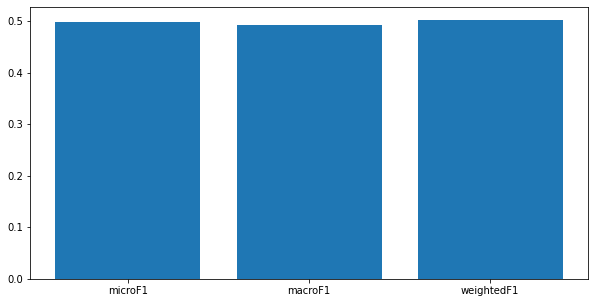

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_constant_0

none     : (array([0.58942795, 0.        ]), array([1., 0.]), array([0.74168565, 0.        ]), array([814, 567]))
micro    : (0.5894279507603186, 0.5894279507603186, 0.5894279507603186, None)
macro    : (0.2947139753801593, 0.5, 0.37084282460136675, None)
weighted : (0.3474253091375086, 0.5894279507603186, 0.43717025231790374, None)

              precision    recall  f1-score   support

           1       0.59      1.00      0.74       814
           0       0.00      0.00      0.00       567

    accuracy                           0.59      1381
   macro avg       0.29      0.50      0.37      1381
weighted avg       0.35      0.59      0.44      1381




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


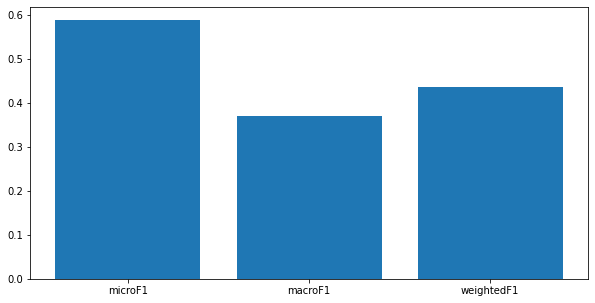

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_constant_1

none     : (array([0.        , 0.41057205]), array([0., 1.]), array([0.        , 0.58213552]), array([814, 567]))
micro    : (0.4105720492396814, 0.4105720492396814, 0.41057204923968144, None)
macro    : (0.2052860246198407, 0.5, 0.2910677618069815, None)
weighted : (0.16856940761687136, 0.4105720492396814, 0.23900857486539975, None)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       814
           0       0.41      1.00      0.58       567

    accuracy                           0.41      1381
   macro avg       0.21      0.50      0.29      1381
weighted avg       0.17      0.41      0.24      1381




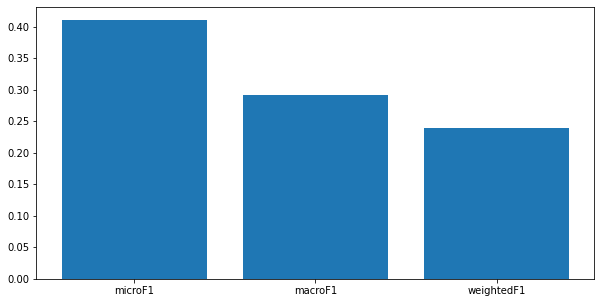

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_most_frequent

none     : (array([0.58942795, 0.        ]), array([1., 0.]), array([0.74168565, 0.        ]), array([814, 567]))
micro    : (0.5894279507603186, 0.5894279507603186, 0.5894279507603186, None)
macro    : (0.2947139753801593, 0.5, 0.37084282460136675, None)
weighted : (0.3474253091375086, 0.5894279507603186, 0.43717025231790374, None)

              precision    recall  f1-score   support

           1       0.59      1.00      0.74       814
           0       0.00      0.00      0.00       567

    accuracy                           0.59      1381
   macro avg       0.29      0.50      0.37      1381
weighted avg       0.35      0.59      0.44      1381




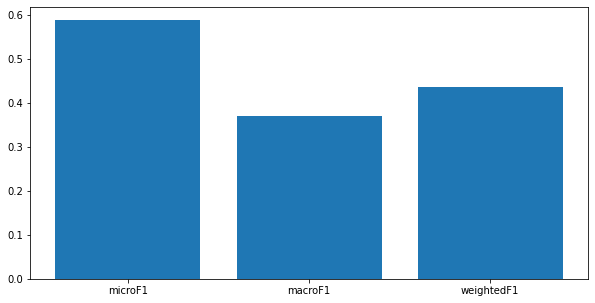

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_stratified

none     : (array([0.59356377, 0.41697417]), array([0.61179361, 0.39858907]), array([0.60254083, 0.40757439]), array([814, 567]))
micro    : (0.5242577842143374, 0.5242577842143374, 0.5242577842143374, None)
macro    : (0.5052689680651277, 0.5051913385246718, 0.5050576130946438, None)
weighted : (0.5210610138188475, 0.5242577842143374, 0.5224930626040715, None)

              precision    recall  f1-score   support

           1       0.59      0.61      0.60       814
           0       0.42      0.40      0.41       567

    accuracy                           0.52      1381
   macro avg       0.51      0.51      0.51      1381
weighted avg       0.52      0.52      0.52      1381




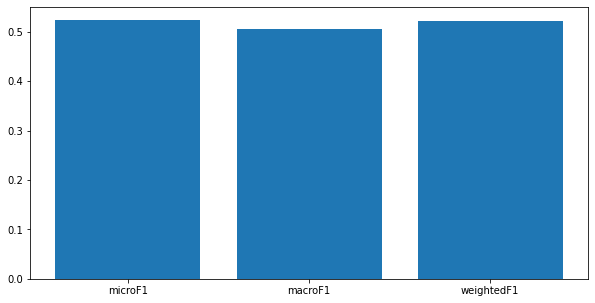

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
for i in predictions:
    print_precision_recall_fscore_support(i, test_labels, predictions[i], label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828}
{'Dummy': 0.0002720355987548828}


In [ ]:
#There is no point of optimizing the dummy classifier, so we will take as optimized the default value again
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['Dummy'] = report_dict['macro avg']['f1-score']
f1_macro_optimized['Dummy'] = report_dict['macro avg']['f1-score']

f1_micro_default['Dummy'] = report_dict['accuracy']
f1_micro_optimized['Dummy'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438}
{'Dummy': 0.5242577842143374}


Όπως βλέπουμε, ο Dummy classifier δεν είναι πολύ αποδοτικός. Το καλύτερό του αποτέλεσμα προέκυψε από τη στρατηγική dc_constant = 1 και αυτό γιατί το dataset μας έχει μια μικρή κλίση προς το label 1.

### Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
start_time = time.time()
model_gnb = gnb.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['GaussianNB'] = train_time

start_time = time.time()
preds = model_gnb.predict(test)
train_time = (time.time() - start_time)

predict_time_default['GaussianNB'] = train_time

# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
spambase_accuracy['gaussian naive bayes'] = model_gnb.score(test, test_labels)

# και ξανατυπώνουμε τα sorted αποτελέσματα
print("Classification Accuracy on the Spambase Dataset (30% test set)\n")

print("---------- Results are sorted ----------\n")

sorted_accuracy = [(k, spambase_accuracy[k]) for k in sorted(spambase_accuracy, key=spambase_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
    print(k,v)

Classification Accuracy on the Spambase Dataset (30% test set)

---------- Results are sorted ----------

gaussian naive bayes 0.8291093410572049
constant 0 0.5894279507603186
most frequent label 0.5894279507603186
stratified 0.5242577842143374
uniform (random) 0.498189717595945
constant 1 0.4105720492396814


In [ ]:
# Compute confusion matrix
pred = model_gnb.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("Gaussian Naive Bayes")
print(cnf_matrix, end='\n\n')

Confusion matrix

Gaussian Naive Bayes
[[600 214]
 [ 22 545]]



Βλέπουμε πως καταφέρνουμε να μαντέψουμε σωστά την κλάση 0, όμως αποτυγχάνουμε στην κλάση 1. Αυτό πιθανόν να οφείλεται στην ύπαρξη περισσότερων δειγμάτων από την κλάση 0.

GaussianNB

none     : (array([0.96463023, 0.71805007]), array([0.73710074, 0.96119929]), array([0.8356546 , 0.82202112]), array([814, 567]))
micro    : (0.8291093410572049, 0.8291093410572049, 0.8291093410572049, None)
macro    : (0.8413401454782694, 0.8491500158166825, 0.8288378561195209, None)
weighted : (0.863391303814057, 0.8291093410572049, 0.830057070294211, None)

              precision    recall  f1-score   support

           1       0.96      0.74      0.84       814
           0       0.72      0.96      0.82       567

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.86      0.83      0.83      1381




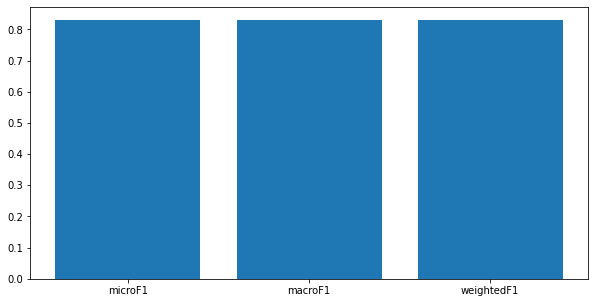

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
print_precision_recall_fscore_support("GaussianNB", test_labels, pred, label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.009163618087768555}
{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.0024285316467285156}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['GaussianNB'] = report_dict['macro avg']['f1-score']
f1_micro_default['GaussianNB'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209}
{'Dummy': 0.5242577842143374, 'GaussianNB': 0.8291093410572049}


Όπως βλέπουμε, έχουμε πολύ καλύτερα αποτελέσματα από τον Dummy Classifier, φτάνοντας ένα αρκετά καλό f1-score. Επιπλέον, είναι εμφανές ότι το f1-macro και f1-micro score είναι αρκετά κοντά, όπως περιμέναμε, καθώς οι κλάσεις μας είναι πάνω κάτω ισορροπημένες στην κατανομή.

### k Nearest Neighbors Classifier (kNN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['kNN'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
pred = knn.predict(test)
total_time = (time.time() - start_time)

predict_time_default['kNN'] = total_time

cnf_matrix = confusion_matrix(test_labels, pred)

print(cnf_matrix)


Fit done in: 0.027793407440185547 seconds
[[683 131]
 [146 421]]


KNeighborsClassifier

none     : (array([0.8238842 , 0.76268116]), array([0.83906634, 0.74250441]), array([0.83140596, 0.75245755]), array([814, 567]))
micro    : (0.7994207096307024, 0.7994207096307024, 0.7994207096307024, None)
macro    : (0.7932826786244995, 0.7907853741187074, 0.7919317580419436, None)
weighted : (0.7987559409296695, 0.7994207096307024, 0.7989919528603535, None)

              precision    recall  f1-score   support

           1       0.82      0.84      0.83       814
           0       0.76      0.74      0.75       567

    accuracy                           0.80      1381
   macro avg       0.79      0.79      0.79      1381
weighted avg       0.80      0.80      0.80      1381




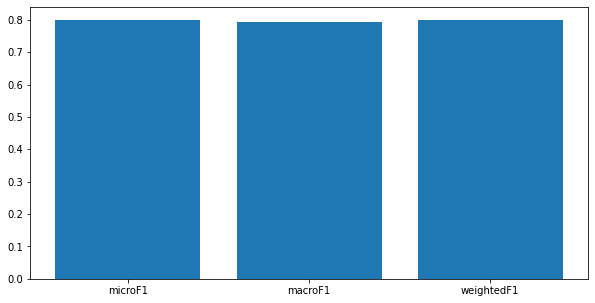

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
print_precision_recall_fscore_support("KNeighborsClassifier", test_labels, pred, label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.009163618087768555, 'kNN': 0.027793407440185547}
{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.0024285316467285156, 'kNN': 0.08798456192016602}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['kNN'] = report_dict['macro avg']['f1-score']
f1_micro_default['kNN'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209}
{'Dummy': 0.5242577842143374, 'GaussianNB': 0.8291093410572049, 'kNN': 0.8291093410572049}


Όπως βλέπουμε ο kNN δεν μας δίνει καλύτερα αποτελέσματα από ότι ο GaussianNB Classifier στο συγκεκριμένο dataset. 

Αυτό πιθανόν να οφείλεται στο γεγονός ότι έχουμε πολλά χαρακτηριστικά, οπότε και μεγάλη διαστασιμότητα (dimensionality). Περιμένουμε σημαντική βελτίωση όταν κανονικοποιήσουμε τα δεδομένα μας.

### MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1,
                    max_iter=2000)

start_time = time.time()
clf.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['MLPClassifier'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = clf.predict(test)
total_time = (time.time() - start_time)

predict_time_default['MLPClassifier'] = total_time

Fit done in: 13.677189111709595 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# Compute confusion matrix
pred = clf.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("MLP Classifier")
print(cnf_matrix, end='\n\n')

Confusion matrix

MLP Classifier
[[772  42]
 [ 42 525]]



Και εδώ βλέπουμε καλύτερα αποτελέσματα σε σχέση με τους προηγούμενους classifiers. Συγκεκριμένα βλέπουμε καλύτερη απόδοση στην κλάση 0, πιθανότατα γιατί ο classifier έχει μάθει καλύτερα να διακρίνει entries από αυτή την κλάση, αφού το dataset μας είναι imbalanced με κλίση προς την κλάση 0.

MLPClassifier

none     : (array([0.94840295, 0.92592593]), array([0.94840295, 0.92592593]), array([0.94840295, 0.92592593]), array([814, 567]))
micro    : (0.939174511223751, 0.939174511223751, 0.939174511223751, None)
macro    : (0.9371644371644372, 0.9371644371644372, 0.9371644371644371, None)
weighted : (0.939174511223751, 0.939174511223751, 0.939174511223751, None)

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       814
           0       0.93      0.93      0.93       567

    accuracy                           0.94      1381
   macro avg       0.94      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381




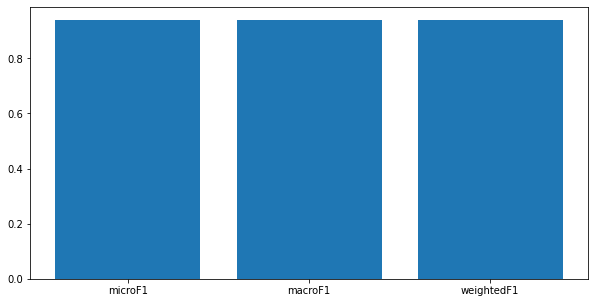

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
print_precision_recall_fscore_support("MLPClassifier", test_labels, pred, label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.009163618087768555, 'kNN': 0.027793407440185547, 'MLPClassifier': 13.677189111709595}
{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.0024285316467285156, 'kNN': 0.08798456192016602, 'MLPClassifier': 0.0009508132934570312}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['MLPClassifier'] = report_dict['macro avg']['f1-score']
f1_micro_default['MLPClassifier'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371}
{'Dummy': 0.5242577842143374, 'GaussianNB': 0.8291093410572049, 'kNN': 0.8291093410572049, 'MLPClassifier': 0.939174511223751}


Όπως βλέπουμε, ο MLP έχει πολύ καλύτερα αποτελέσματα από τους 3 προηγούμενους classifiers. Αυτό έχει να κάνει πιθανότατα γιατί βάλαμε πολύ μεγάλο όριο στο max_iter. Είναι καλύτερος από τους άλλους 3 και συγκεκριμένα από τον kNN γιατί τα δεδομένα μας δεν είναι βελτιστοποιημένα στο κομμάτι του preprocessing, πχ scaling που βοηθάει τον kNN, οπότε ο MLP που αντιδράει καλύτερα σε αυτές τις περιπτώσεις μαθαίνει καλύτερα τα βάρη ενώ ο kNN δεν έχει κάποια εκπαίδευση. 

### SVM Classifier

#### Linear Kernel

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.svm import LinearSVC # "Support vector classifier"

model_svm_linear = LinearSVC()

start_time = time.time()
model_svm_linear.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['SVM_linear'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = model_svm_linear.predict(test)
total_time = (time.time() - start_time)

predict_time_default['SVM_linear'] = total_time

Fit done in: 0.20926547050476074 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Compute confusion matrix
pred = model_svm_linear.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("SVM Classifier - Linear Kernel")
print(cnf_matrix, end='\n\n')

Confusion matrix

SVM Classifier - Linear Kernel
[[706 108]
 [ 61 506]]



Στον συγκεκριμένο classifier βλέπουμε την καλύτερη απόδοση μέχρι τώρα.. 

Δοκιμάσαμε και τον SVC classifier και η εκπαίδευση πήρε περίπου 10 λεπτά, όμως έδωσε καλύτερα αποτελέσματα από τον linearSVC. Αυτό είναι γιατί τα penalty, tol και loss είναι πιο αυστηρά στον SVC σε σχέση με τον LinearSVC.

SVM_linear

none     : (array([0.92046936, 0.82410423]), array([0.86732187, 0.89241623]), array([0.89310563, 0.85690093]), array([814, 567]))
micro    : (0.8776249094858798, 0.8776249094858798, 0.8776249094858797, None)
macro    : (0.8722867978375073, 0.8798690465357132, 0.8750032803812847, None)
weighted : (0.8809045336358603, 0.8776249094858798, 0.8782409923254596, None)

              precision    recall  f1-score   support

           1       0.92      0.87      0.89       814
           0       0.82      0.89      0.86       567

    accuracy                           0.88      1381
   macro avg       0.87      0.88      0.88      1381
weighted avg       0.88      0.88      0.88      1381




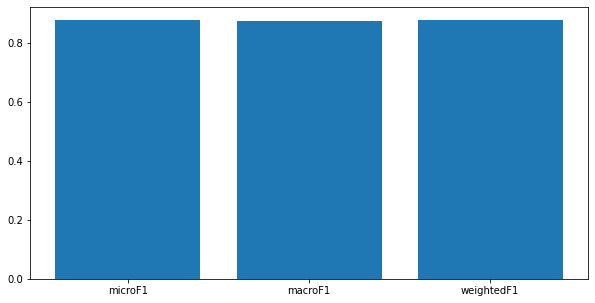

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
print_precision_recall_fscore_support("SVM_linear", test_labels, pred, label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.009163618087768555, 'kNN': 0.027793407440185547, 'MLPClassifier': 13.677189111709595, 'SVM_linear': 0.20926547050476074}
{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.0024285316467285156, 'kNN': 0.08798456192016602, 'MLPClassifier': 0.0009508132934570312, 'SVM_linear': 0.0014939308166503906}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['SVM_linear'] = report_dict['macro avg']['f1-score']
f1_micro_default['SVM_linear'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847}
{'Dummy': 0.5242577842143374, 'GaussianNB': 0.8291093410572049, 'kNN': 0.8291093410572049, 'MLPClassifier': 0.939174511223751, 'SVM_linear': 0.8776249094858798}


#### RBF Kernel

In [ ]:
model_svm_rbf = SVC(kernel='rbf')

start_time = time.time()
model_svm_rbf.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['SVM_rbf'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = model_svm_rbf.predict(test)
total_time = (time.time() - start_time)

predict_time_default['SVM_rbf'] = total_time

Fit done in: 0.9699532985687256 seconds


In [ ]:
# Compute confusion matrix
pred = model_svm_rbf.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("SVM Classifier - RBF Kernel")
print(cnf_matrix, end='\n\n')

Confusion matrix

SVM Classifier - RBF Kernel
[[747  67]
 [325 242]]



Εδώ βλέπουμε πως έχουμε χειρότερα αποτελέσματα από τον linear kernel. Έτσι συμπεραίνουμε με μεγαλύτερη σιγουρία πως το dataset μας πιθανότατα είναι γραμμικά διαχωρίσιμο και η μετατροπή του με rbf kernel function προκαλεί προβλήματα. 

SVM_rbf

none     : (array([0.69682836, 0.78317152]), array([0.91769042, 0.42680776]), array([0.7921527 , 0.55251142]), array([814, 567]))
micro    : (0.7161477190441708, 0.7161477190441708, 0.7161477190441708, None)
macro    : (0.739999939622277, 0.6722490889157555, 0.6723320598304255, None)
weighted : (0.7322784475085258, 0.7161477190441708, 0.6937626891884356, None)

              precision    recall  f1-score   support

           1       0.70      0.92      0.79       814
           0       0.78      0.43      0.55       567

    accuracy                           0.72      1381
   macro avg       0.74      0.67      0.67      1381
weighted avg       0.73      0.72      0.69      1381




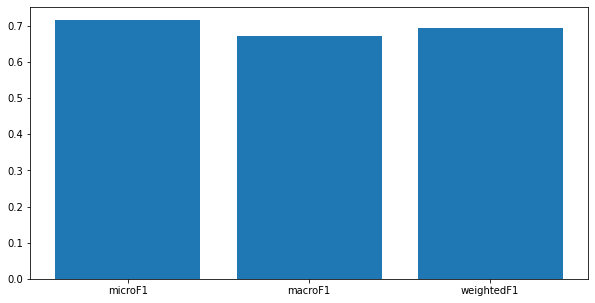

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
print_precision_recall_fscore_support("SVM_rbf", test_labels, pred, label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.009163618087768555, 'kNN': 0.027793407440185547, 'MLPClassifier': 13.677189111709595, 'SVM_linear': 0.20926547050476074, 'SVM_rbf': 0.9699532985687256}
{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.0024285316467285156, 'kNN': 0.08798456192016602, 'MLPClassifier': 0.0009508132934570312, 'SVM_linear': 0.0014939308166503906, 'SVM_rbf': 0.3070380687713623}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['SVM_rbf'] = report_dict['macro avg']['f1-score']
f1_micro_default['SVM_rbf'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255}
{'Dummy': 0.5242577842143374, 'GaussianNB': 0.8291093410572049, 'kNN': 0.8291093410572049, 'MLPClassifier': 0.939174511223751, 'SVM_linear': 0.8776249094858798, 'SVM_rbf': 0.7161477190441708}


#### Poly Kernel

In [ ]:
model_svm_poly = SVC(kernel='poly')

start_time = time.time()
model_svm_poly.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['SVM_poly'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = model_svm_poly.predict(test)
total_time = (time.time() - start_time)

predict_time_default['SVM_poly'] = total_time

Fit done in: 5.564983367919922 seconds


In [ ]:
# Compute confusion matrix
pred = model_svm_poly.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("SVM Classifier - Poly Kernel")
print(cnf_matrix, end='\n\n')

Confusion matrix

SVM Classifier - Poly Kernel
[[807   7]
 [496  71]]



Εδώ βλέπουμε πως έχουμε μεγάλη κλίση στην πρόβλεψη της κλάσης 0. Πιθανότατα είναι γιατί τα δεδομένα μας είναι απλωμένα στο πεδίο με τέτοιο τρόπο, που η μετατροπή τους μέσω μιας polynomial kernel function τα μπλέκει και δεν επιτρέπει τον ξεκάθαρο διαχωρισμό τους.

SVM_poly

none     : (array([0.61933998, 0.91025641]), array([0.99140049, 0.12522046]), array([0.76239962, 0.22015504]), array([814, 567]))
micro    : (0.6357711803041275, 0.6357711803041275, 0.6357711803041275, None)
macro    : (0.764798197453608, 0.5583104749771416, 0.49127733043322236, None)
weighted : (0.7387821376691821, 0.6357711803041275, 0.5397691523328332, None)

              precision    recall  f1-score   support

           1       0.62      0.99      0.76       814
           0       0.91      0.13      0.22       567

    accuracy                           0.64      1381
   macro avg       0.76      0.56      0.49      1381
weighted avg       0.74      0.64      0.54      1381




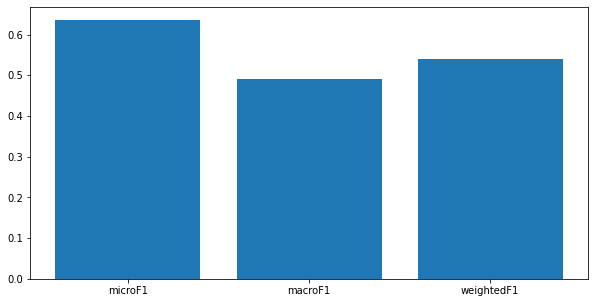

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [ ]:
print_precision_recall_fscore_support("SVM_poly", test_labels, pred, label_names)

In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.009163618087768555, 'kNN': 0.027793407440185547, 'MLPClassifier': 13.677189111709595, 'SVM_linear': 0.20926547050476074, 'SVM_rbf': 0.9699532985687256, 'SVM_poly': 5.564983367919922}
{'Dummy': 0.0002720355987548828, 'GaussianNB': 0.0024285316467285156, 'kNN': 0.08798456192016602, 'MLPClassifier': 0.0009508132934570312, 'SVM_linear': 0.0014939308166503906, 'SVM_rbf': 0.3070380687713623, 'SVM_poly': 0.21497607231140137}


In [ ]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['SVM_poly'] = report_dict['macro avg']['f1-score']
f1_micro_default['SVM_poly'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
{'Dummy': 0.5242577842143374, 'GaussianNB': 0.8291093410572049, 'kNN': 0.8291093410572049, 'MLPClassifier': 0.939174511223751, 'SVM_linear': 0.8776249094858798, 'SVM_rbf': 0.7161477190441708, 'SVM_poly': 0.6357711803041275}


Όπως βλέπουμε, την καλύτερη απόδοση την έχει η linear kernel function και μάλιστα κατά μεγάλη διαφορά. Όμως υπάρχει αντιστρόφως ανάλογη απόδοση στον χρόνο εκπαίδεσης.

## Section C: Optimizing Classifiers

### GridSearchCV & Print

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

def gridsearch_init_print(classifier, param_grid, pipe, train=train, train_labels=train_labels, test=test, test_labels=test_labels):

    # We will use 5 fold validation
    estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

    start_time = time.time()
    estimator.fit(train, train_labels)
    total_time = (time.time() - start_time)

    train_time_optimized[classifier] = total_time
    print("Fit done in:",(time.time() - start_time)/60,"minutes")

    start_time = time.time()

    preds = estimator.predict(test)
    total_time = (time.time() - start_time)

    predict_time_optimized[classifier] = total_time

    print(classification_report(test_labels, preds))

    print(estimator.best_estimator_)
    print(estimator.best_params_)

    # Compute confusion matrix
    pred = estimator.predict(test)
    print("Confusion matrix\n")
    cnf_matrix = confusion_matrix(test_labels, pred)
    print(classifier, "Classifier", )
    print(cnf_matrix, end='\n\n')

    report_dict = classification_report(test_labels, preds, output_dict = True)
    f1_macro_optimized[classifier] = report_dict['macro avg']['f1-score']
    f1_micro_optimized[classifier] = report_dict['accuracy']


    print("------------F1 macro------------")
    print("Default:", f1_macro_default)
    print("Optimiz:", f1_macro_optimized)
    print("------------F1 micro------------")
    print("Default:", f1_micro_default)
    print("Optimiz:", f1_micro_optimized)



### Sample to test dataset

In [ ]:
from sklearn.utils import shuffle

# define max samples
max_samples = 500

# extract data
all_features = data.iloc[0:, :-1]
all_labels = data.iloc[0:, -1]

# shuffle respectively
shuffled_features, shuffled_labels = shuffle(all_features, all_labels, random_state=341976)
sdata = shuffled_features.iloc[0:max_samples-1,:]
slabels = shuffled_labels.iloc[0:max_samples-1]

# convert to np array
snp_samples = sdata.values
snp_labels = slabels.values

# check frequencies
freq = np.bincount(snp_labels)
for i in range(len(freq)):
    print("For label:", i, "percentage is", "{:.2%}".format(freq[i]/max_samples))

For label: 0 percentage is 57.20%
For label: 1 percentage is 42.60%


In [ ]:
# split to train, test
# Split our data
strain, stest, strain_labels, stest_labels = train_test_split(snp_samples, 
                                                          snp_labels, 
                                                          test_size=0.3)

print(strain.shape)
print(stest.shape)

(349, 57)
(150, 57)


### Balance Dataset - Oversampling

In [ ]:
sampler = SMOTE()
train, train_labels = sampler.fit_sample(np_samples, np_labels)

# print length of train set to validate oversampling
print("Length of train_set is =", len(train), '\n')

Length of train_set is = 5576 



### Variance Threshold

Ελέγχουμε τη διασπορά κάθε χαρακτηριστικού στο train dataset ούτως ώστε να καταλάβουμε ποία θα είναι η επιλογή μας για το κατώφλι διασποράς.

In [ ]:
train_Var = np.var(train, axis=0)
print(train_Var)

[9.00154830e-02 1.38580913e+00 2.41724745e-01 2.20534288e+00
 4.42581312e-01 7.57132351e-02 1.64543143e-01 1.53545901e-01
 8.18212192e-02 3.92799002e-01 4.40907762e-02 6.65398448e-01
 8.80749696e-02 1.06363268e-01 7.55659603e-02 6.55249793e-01
 2.15754253e-01 2.71789268e-01 3.00513499e+00 2.66515109e-01
 1.43403322e+00 1.08160253e+00 1.35797079e-01 2.03710700e-01
 2.34785418e+00 6.59922676e-01 9.43879606e+00 2.62163252e-01
 2.91821363e-01 1.74043644e-01 1.35113916e-01 8.94082495e-02
 2.58097920e-01 8.99038710e-02 2.35490129e-01 1.37774022e-01
 1.59419015e-01 4.03180114e-02 1.57571113e-01 1.03687468e-01
 1.07907222e-01 4.87610269e-01 4.17370094e-02 3.20512531e-01
 8.62476864e-01 6.90837804e-01 4.87969333e-03 6.77533262e-02
 4.99337208e-02 6.30860621e-02 1.00632162e-02 6.27462909e-01
 7.59367848e-02 1.60167290e-01 1.05639453e+03 3.75580840e+04
 3.69103399e+05]


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# initialize the selector
selector = VarianceThreshold(0)
# fit the selector in the data
train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(5576, 57)
(5576, 57)


In [ ]:
selector = VarianceThreshold(0.05)

train_reduced = selector.fit_transform(train)
print(train_reduced)

mask = selector.get_support()
print(mask)

print(train.shape)
print(train_reduced.shape)

[[0.00000000e+00 6.40000000e-01 6.40000000e-01 ... 3.75600000e+00
  6.10000000e+01 2.78000000e+02]
 [2.10000000e-01 2.80000000e-01 5.00000000e-01 ... 5.11400000e+00
  1.01000000e+02 1.02800000e+03]
 [6.00000000e-02 0.00000000e+00 7.10000000e-01 ... 9.82100000e+00
  4.85000000e+02 2.25900000e+03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.87100000e+00
  2.60000000e+01 1.51000000e+02]
 [0.00000000e+00 1.47246549e+00 0.00000000e+00 ... 1.09177775e+01
  1.40000000e+02 1.68274154e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.89414832e+00
  5.89274337e+01 1.59970973e+02]]
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True False  True
 False  True False  True  True  True  True  True  True]
(5576, 57)
(5576, 51)


In [ ]:
selector = VarianceThreshold(0.2)

train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(5576, 57)
(5576, 29)


Εδώ βλέπουμε πως πρέπει να επιλέξουμε μια τιμή μικρότερη του 0.05, καθώς τα features μειώνονται δραστικά, οπότε μπορεί να χάνουμε σημαντική πληροφορία.

### Dummy Classifier

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")

start_time = time.time()
model = dc_stratified.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['Dummy'] = train_time
train_time_optimized['Dummy'] = train_time

start_time = time.time()
preds = dc_stratified.predict(test)
pred_time = (time.time() - start_time)

predict_time_default['Dummy'] = train_time
predict_time_optimized['Dummy'] = train_time


print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.58      0.51      0.54       814
           1       0.40      0.48      0.44       567

    accuracy                           0.50      1381
   macro avg       0.49      0.49      0.49      1381
weighted avg       0.51      0.50      0.50      1381



In [ ]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.0007357597351074219, 'GaussianNB': 0.009163618087768555, 'kNN': 0.027793407440185547, 'MLPClassifier': 13.677189111709595, 'SVM_linear': 0.20926547050476074, 'SVM_rbf': 0.9699532985687256, 'SVM_poly': 5.564983367919922}
{'Dummy': 0.0007357597351074219, 'GaussianNB': 0.0024285316467285156, 'kNN': 0.08798456192016602, 'MLPClassifier': 0.0009508132934570312, 'SVM_linear': 0.0014939308166503906, 'SVM_rbf': 0.3070380687713623, 'SVM_poly': 0.21497607231140137}


Όπως βλέπουμε εδώ, δεν πετύχαμε κάποια σημαντική βελτίωση, στον Dummy Classifier, με την προεπεξεργασία δεδομένων.

### Optimized Gaussian Naive Bayes Classifier

In [ ]:
from imblearn.pipeline import Pipeline

# import the known classes for preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

clf = GaussianNB()

In [ ]:
param_grid = {
    'selector__threshold': [0, 0.01, 0.02, 0.03, 0.04, 0.05] #according to the calculations we did in the beginning of this section
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector), ('gaussiannb', clf)], memory = 'tmp')
gridsearch_init_print('GaussianNB', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0467s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0549s.) Setting batch_size=4.


Fit done in: 0.005206199487050375 minutes
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        79
           1       0.81      0.93      0.87        71

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('gaussiannb', GaussianNB())])
{'selector__threshold': 0}
Confusion matrix

GaussianNB Classifier
[[64 15]
 [ 5 66]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8666429587482218}
------------F1 micro------------
Default: {'Dummy': 0.5242577842143374,

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0840s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [ ]:
param_grid = {
    'selector__threshold': [0.03], #according to the calculations we did in the beginning of this section
    'pca__n_components': [30, 32, 38, 40, 42, 44, 45],
}

clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gaussiannb', clf)], memory = 'tmp')
gridsearch_init_print('GaussianNB', param_grid, pipe)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1239s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


Fit done in: 0.028196040789286295 minutes
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       814
           1       0.83      0.88      0.85       567

    accuracy                           0.88      1381
   macro avg       0.87      0.88      0.87      1381
weighted avg       0.88      0.88      0.88      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.03)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=30)),
                ('gaussiannb', GaussianNB())])
{'pca__n_components': 30, 'selector__threshold': 0.03}
Confusion matrix

GaussianNB Classifier
[[710 104]
 [ 68 499]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.50505761309

Βλέπουμε πως με sacled dataset ο classifier τα πηγαίνει καλύτερα από οτι με το κανονικό.

In [ ]:
param_grid = {
    'selector__threshold': [0.03], #according to the calculations we did in the beginning of this section
    'pca__n_components': [43, 45, 46, 47, 50, 60, 70]
}

clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gaussiannb', clf)], memory = 'tmp')
gridsearch_init_print('GaussianNB', param_grid, pipe)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0429s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0956s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1981s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s


Fit done in: 0.0121140718460083 minutes
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       814
           1       0.83      0.83      0.83       567

    accuracy                           0.86      1381
   macro avg       0.86      0.86      0.86      1381
weighted avg       0.86      0.86      0.86      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.03)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=47)),
                ('gaussiannb', GaussianNB())])
{'pca__n_components': 47, 'selector__threshold': 0.03}
Confusion matrix

GaussianNB Classifier
[[719  95]
 [ 96 471]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.6s finished


Βλέπουμε μια αισθητή βελτίωση στην απόδοση με 46 components στην μέθοδο pca.

In [ ]:
param_grid = {
    'selector__threshold': [0.03], #according to the calculations we did in the beginning of this section
    'pca__n_components': [47]
}

clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('ros', ros), ('gaussiannb', clf)], memory = 'tmp')
gridsearch_init_print('GaussianNB', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0653s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Fit done in: 0.005329267183939616 minutes
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       814
           1       0.82      0.89      0.85       567

    accuracy                           0.87      1381
   macro avg       0.87      0.88      0.87      1381
weighted avg       0.88      0.87      0.87      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.03)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=47)),
                ('ros', RandomOverSampler()), ('gaussiannb', GaussianNB())])
{'pca__n_components': 47, 'selector__threshold': 0.03}
Confusion matrix

GaussianNB Classifier
[[705 109]
 [ 65 502]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Op

Βλέπουμε όμως πως πέφτει με random over sampler, οπότε τον αφαιρούμε.

In [ ]:
print(train.shape)
print(train_reduced.shape)

(5576, 57)
(5576, 29)


Βλέπουμε ότι το καλύτερο αποτέλεσμα το πετύχαμε για Variance Threshold 0.02. Δεν έχουμε τόσα πολλά features συγκριτικά με τον αριθμό των δειγμάτων, οπότε σταματάμε σε αυτό το threshold.

Θα δοκιμάσουμε και με PCA:

In [ ]:
# initialize the estimators (transformers and classifier) without parameters
clf = GaussianNB()

param_grid = {
    'selector__threshold': [0.04],
    'pca__n_components': [31,32,33,34,35,36,37]
}

In [ ]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca), ('gaussiannb', clf)], memory = 'tmp')
gridsearch_init_print('GaussianNB', param_grid, pipe)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0944s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.4s finished


Fit done in: 0.027623478571573892 minutes
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       814
           1       0.87      0.66      0.75       567

    accuracy                           0.82      1381
   macro avg       0.83      0.79      0.80      1381
weighted avg       0.82      0.82      0.81      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.04)),
                ('pca', PCA(n_components=37)), ('gaussiannb', GaussianNB())])
{'pca__n_components': 37, 'selector__threshold': 0.04}
Confusion matrix

GaussianNB Classifier
[[757  57]
 [195 372]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185}
-----

Εδώ βλέπουμε ότι έχουμε λιγότερες διαστάσεις αλλά απειροελάχιστη διαφορά απόδοσης σε σχέση με τον non-optimized classifier.

Στο καινούργιο pipeline βρήκαμε καλύτερο σκορ, χρησιμοποιώντας variance_threshold=0.04 και PCA.

Εδώ να σημειώσουμε πως η επιλογή μας στα components του PCA έγινε μετά από πειραματισμούς με μεγαλύτερες τιμές, που δεν απέδιδαν παραπάνω. 

Μπορεί να κάναμε αρκετό pre-processing και να χρησιμοποιήσαμε gridsearchCV αλλά δεν είχε κάποιά αξιόλογή επίδραση στον Gaussian Naive Bayes, τουλάχιστον με τις παραμέτρους που δοκιμάσαμε. 

### Optimized kNN Classifier

Αρχικά θα δοκιμάσουμε μόνο με Variance Threshold. Θα χρησιμοποιήσουμε όλους τους πυρήνες (n_jobs = -1) και verbose = 10 για να ελέγχουμε την πορεία της εκπαίδευσης.

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    # 'selector__threshold': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'kNN__n_neighbors': [1, 2, 3, 4, 5, 10, 15],
    'kNN__weights': ['uniform', 'distance'],
    'kNN__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski
}

pipe = Pipeline(steps=[('kNN', clf)], memory = 'tmp')
gridsearch_init_print('kNN', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1244s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 244 tas

Fit done in: 0.32028942505518593 minutes
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        79
           1       0.92      0.66      0.77        71

    accuracy                           0.81       150
   macro avg       0.84      0.81      0.81       150
weighted avg       0.84      0.81      0.81       150

Pipeline(memory='tmp',
         steps=[('kNN',
                 KNeighborsClassifier(metric='hamming', n_jobs=-1,
                                      n_neighbors=3, weights='distance'))])
{'kNN__metric': 'hamming', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance'}
Confusion matrix

kNN Classifier
[[75  4]
 [24 47]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'Gau

Επιλέγουμε να προχωρήσουμε πρώτα με τα weights. Κρατάμε το 'distance' ως καλύτερο.

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    # 'selector__threshold': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'kNN__weights': ['distance'],
    'kNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'kNN__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski
}

pipe = Pipeline(steps=[('kNN', clf)], memory = 'tmp')
gridsearch_init_print('kNN', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1128s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 244 tas

Fit done in: 0.24884315331776938 minutes
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        79
           1       0.92      0.66      0.77        71

    accuracy                           0.81       150
   macro avg       0.84      0.81      0.81       150
weighted avg       0.84      0.81      0.81       150

Pipeline(memory='tmp',
         steps=[('kNN',
                 KNeighborsClassifier(metric='hamming', n_jobs=-1,
                                      n_neighbors=3, weights='distance'))])
{'kNN__metric': 'hamming', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance'}
Confusion matrix

kNN Classifier
[[75  4]
 [24 47]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'Gau

Βλέπουμε πως παρόλο που δώσαμε μεγάλο εύρος neighbors, επιλέγεται πάλι το k=5. Οπότε κρατάμε αυτό ως βέλτιστο και metric = hamming.

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    # 'selector__threshold': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'kNN__weights': ['distance'],
    'kNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    'kNN__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski
}

pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('kNN', clf)], memory = 'tmp')
gridsearch_init_print('kNN', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1189s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 244 tas

Fit done in: 0.2664770483970642 minutes
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        79
           1       0.93      0.75      0.83        71

    accuracy                           0.85       150
   macro avg       0.87      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=9, weights='distance'))])
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 9, 'kNN__weights': 'distance'}
Confusion matrix

kNN Classifier
[[75  4]
 [18 53]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.67233205983

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    # 'selector__threshold': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'pca__n_components': [31,32,33,34,35,36,37],
    'kNN__weights': ['distance'],
    'kNN__n_neighbors': [5, 6, 7, 8, 9, 10, 15],
    'kNN__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski
}

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('sampler', ros), ('kNN', clf)], memory = 'tmp')
gridsearch_init_print('kNN', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fit done in: 1.2341089089711508 minutes
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        79
           1       0.86      0.80      0.83        71

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.85       150
weighted avg       0.85      0.85      0.85       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=34)),
                ('sampler', RandomOverSampler()),
                ('kNN',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=15, weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 15, 'kNN__weights': 'distance', 'pca__n_components': 34}
Confusion matrix

kNN Classifier
[[70  9]
 [14 57]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.93

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    'pca__n_components': [34],
    'kNN__weights': ['distance'],
    'kNN__n_neighbors': [14, 15, 18, 20],
    'kNN__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski
}

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('sampler', ros), ('kNN', clf)], memory = 'tmp')
gridsearch_init_print('kNN', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1235s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished


Fit done in: 0.09828266302744547 minutes
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        79
           1       0.86      0.80      0.83        71

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.85       150
weighted avg       0.85      0.85      0.85       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=34)),
                ('sampler', RandomOverSampler()),
                ('kNN',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=14, weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 14, 'kNN__weights': 'distance', 'pca__n_components': 34}
Confusion matrix

kNN Classifier
[[70  9]
 [14 57]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

param_grid = {
    # 'pca__n_components': [34],
    'selector__threshold': [0, 0.1, 0.2],
    'kNN__n_neighbors': [5, 6, 7, 10, 15],
    'kNN__weights': ['distance'],
    'kNN__metric': ['hamming'] #default minkowski
}

pipe = Pipeline(steps=[('selector', selector),('scaler', scaler), ('kNN', clf)], memory = 'tmp')
gridsearch_init_print('kNN', param_grid, pipe)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.8s finished


Fit done in: 0.29848993619283043 minutes
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       814
           1       0.94      0.66      0.77       567

    accuracy                           0.84      1381
   macro avg       0.87      0.81      0.83      1381
weighted avg       0.86      0.84      0.83      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.2)),
                ('scaler', StandardScaler()),
                ('kNN',
                 KNeighborsClassifier(metric='hamming', n_jobs=-1,
                                      n_neighbors=6, weights='distance'))])
{'kNN__metric': 'hamming', 'kNN__n_neighbors': 6, 'kNN__weights': 'distance', 'selector__threshold': 0.2}
Confusion matrix

kNN Classifier
[[789  25]
 [194 373]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371,

Αν και βάλαμε όλο το dataset να κάνει fit εξ αρχής, χωρίς να δοκιμάσουμε το sampled dataset, μας έβαλε σχεδόν 100% επιτυχία (αν εξαιρέσουμε 3 False Negatives, από confusion matrix) οπότε σταματάμε την βελτιστοποίηση εδώ.

Οι βελτιστες παράμετροι φαίνονται παραπάνω.

### Optimized MLP Classifier

Δοκιμάζουμε όλες τις παραμέτρους και βλέπουμε ποιός συνδυασμός τους μας δίνει τα καλύτερα αποτελέσματα.

Στη συνέχεια θα βάλουμε scaler, ros, pca κλπ.

In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs','sgd','adam'], # default ‘adam’
    'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(5,) , (15,) , (20,) , (50,) , (100,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['constant','invscaling','adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [100,150,200,250],
    'mlpclassifier__alpha': [0.0001, 0.002, 0.05] 
}

In [ ]:
mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe, strain, strain_labels, stest, stest_labels)

In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,), (5,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [500, 1000],
    'mlpclassifier__alpha': [0.05, 0.1] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.6s finished


Fit done in: 0.25393646558125815 minutes
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        79
           1       0.86      0.90      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.1,
                               hidden_layer_sizes=(5,),
                               learning_rate='adaptive', max_iter=1000,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.1, 'mlpclassifier__hidden_layer_sizes': (5,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 1000, 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.003}
Confusion matrix

M

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(1,), (2,), (3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [500, 600],
    'mlpclassifier__alpha': [0.1, 0.2] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0788s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.3s finished


Fit done in: 0.20974031289418538 minutes
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        79
           1       0.90      0.87      0.89        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.2,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.2, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.003}
Confusion matrix

MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [400, 500],
    'mlpclassifier__alpha': [0.2, 0.3, 0.5] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.0s finished


Fit done in: 0.10457632541656495 minutes
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        79
           1       0.90      0.90      0.90        71

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.3,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.3, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.003}
Confusion matrix

MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [490, 500, 510],
    'mlpclassifier__alpha': [0.2, 0.25, 0.3, 0.4] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.5s finished


Fit done in: 0.22904094457626342 minutes
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        79
           1       0.88      0.86      0.87        71

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.003}
Confusion matrix

M

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Βλέπουμε ότι έχουμε πετύχει πολύ καλά αποτελέσματα και τώρα θα εκπαιδεύσουμε το μεγάλο dataset.

In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__alpha': [0.25] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


Fit done in: 0.10798076391220093 minutes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       814
           1       0.90      0.93      0.92       567

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'selector__threshold': 0.003}
Confusion matrix

M

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mlp = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


Fit done in: 0.05548422733942668 minutes
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       814
           1       0.91      0.90      0.91       567

    accuracy                           0.93      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('scaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'se

Mε standardization η απόδοση βλέπουμε πως βελτιώθηκε κατά 1%.

In [ ]:
param_grid = {
    'pca__n_components': [10, 20, 30, 40, 50],
    # 'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__alpha': [0.25] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca',pca), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1846s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    4.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.4s finished


Fit done in: 0.10226383606592813 minutes
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       814
           1       0.92      0.92      0.92       567

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=50)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'pca__n_components': 50}
Confusion mat

In [ ]:
param_grid = {
    'pca__n_components': [35, 38, 45, 47, 50, 53, 56, 57],
    # 'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__alpha': [0.25] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca',pca), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.2s finished


Fit done in: 0.17878729104995728 minutes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       814
           1       0.91      0.93      0.92       567

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=53)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'pca__n_components': 53}
Confusion mat

In [ ]:
param_grid = {
    'pca__n_components': [53],
    # 'selector__threshold': [0.003],
    'mlpclassifier__solver': ['lbfgs'], # default ‘adam’
    'mlpclassifier__activation': ['tanh'], # default ‘relu’
    'mlpclassifier__hidden_layer_sizes': [(3,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'mlpclassifier__learning_rate': ['adaptive'], # Only used when solver='sgd'.
    'mlpclassifier__max_iter': [500],
    'mlpclassifier__alpha': [0.25] 
}

mlp = MLPClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca',pca), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Fit done in: 0.03241424560546875 minutes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       814
           1       0.90      0.93      0.91       567

    accuracy                           0.93      1381
   macro avg       0.92      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=53)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'pca__n_components': 53}
Confusion mat

Με την μέθοδο pca η απόδοση βελτιωθηκε ελαχιστα.

In [ ]:
mlp = MLPClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca',pca), ('mlpclassifier', mlp)], memory = 'tmp')
gridsearch_init_print('MLPClassifier', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fit done in: 0.041301254431406656 minutes
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       814
           1       0.93      0.92      0.92       567

    accuracy                           0.94      1381
   macro avg       0.94      0.93      0.94      1381
weighted avg       0.94      0.94      0.94      1381

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=53)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.25,
                               hidden_layer_sizes=(3,),
                               learning_rate='adaptive', max_iter=500,
                               solver='lbfgs'))])
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.25, 'mlpclassifier__hidden_layer_sizes': (3,), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 500, 'mlpclassifier__solver': 'lbfgs', 'pca__n_components': 53}
Confusion ma

Με τον random oversample η απόδοση επίσης βελτιώθηκε, αλλά πάρα πολύ λίγο. Δεν είναι σημαντική η συνεισφορά του.

Αφου τρέξαμε πολλές φορές με διαφορετικές υπερπαραμέτρους παρακάτω παραθέτουμε τις καλύτερες παραμέτρους:

|  Parameter          | Value    |
|---------------------|----------|
| Activation          | tanh     |
| Hidden Layer Sizes  | 3        |
| Learning Rat        | Adaptive |
| Max iterations      | 500      |
| Solver              | lbfgs    |
| Alpha               | 0.25     |


### Optimized SVM Classifier

#### Linear Kernel

In [ ]:
## Parameters to optimize
param_grid = {
    'selector__threshold': [0, 0.001, 0.002, 0.003, 0.004],
    'linear_svm__loss': ["hinge", "squared_hinge"], # default ‘squared_hinge’
    'linear_svm__tol': [1e-2, 1e-8, 1e-14] # default 1e-4
}

linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0405s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0941s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1976s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.5s


Fit done in: 0.035607441266377764 minutes
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        79
           1       0.91      0.61      0.73        71

    accuracy                           0.79       150
   macro avg       0.82      0.78      0.78       150
weighted avg       0.82      0.79      0.78       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('linear_svm', LinearSVC(tol=1e-14))])
{'linear_svm__loss': 'squared_hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.003}
Confusion matrix

SVM_linear Classifier
[[75  4]
 [28 43]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975

[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Δοκιμάζουμε με μεγαλύτερο tol
param_grid = {
    'selector__threshold': [0, 0.001, 0.002, 0.003, 0.004],
    'linear_svm__loss': ["hinge", "squared_hinge"], # default ‘squared_hinge’
    'linear_svm__tol': [1e-3, 1e-10, 1e-14, 1e-16] # default 1e-4
}

linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0283s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0951s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1596s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    2.2s


Fit done in: 0.045882225036621094 minutes
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        79
           1       0.92      0.69      0.79        71

    accuracy                           0.83       150
   macro avg       0.85      0.82      0.82       150
weighted avg       0.84      0.83      0.82       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('linear_svm', LinearSVC(tol=0.001))])
{'linear_svm__loss': 'squared_hinge', 'linear_svm__tol': 0.001, 'selector__threshold': 0}
Confusion matrix

SVM_linear Classifier
[[75  4]
 [22 49]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 

[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Δοκιμάζουμε με μεγαλύτερο tol
param_grid = {
    'selector__threshold': [0, 0.001, 0.002, 0.003, 0.004],
    'linear_svm__loss': ["hinge", "squared_hinge"], # default ‘squared_hinge’
    'linear_svm__tol': [1e-14, 1e-16, 1e-20] # default 1e-4
}

linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0352s.) Setting batch_size=2.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0859s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1821s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.5s


Fit done in: 0.035588677724202475 minutes
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        79
           1       0.91      0.55      0.68        71

    accuracy                           0.76       150
   macro avg       0.80      0.75      0.75       150
weighted avg       0.80      0.76      0.75       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.002)),
                ('linear_svm', LinearSVC(loss='hinge', tol=1e-16))])
{'linear_svm__loss': 'hinge', 'linear_svm__tol': 1e-16, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[75  4]
 [32 39]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021

[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Δοκιμάζουμε με μεγαλύτερο tol
param_grid = {
    'selector__threshold': [0, 0.001, 0.002, 0.003, 0.004],
    'linear_svm__loss': ["hinge", "squared_hinge"], # default ‘squared_hinge’
    'linear_svm__tol': [1e-14, 1e-22, 1e-23] # default 1e-4
}

linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0405s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0857s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1579s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.5s


Fit done in: 0.03551657597223918 minutes
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        79
           1       0.82      0.63      0.71        71

    accuracy                           0.76       150
   macro avg       0.77      0.75      0.75       150
weighted avg       0.77      0.76      0.76       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.001)),
                ('linear_svm', LinearSVC(tol=1e-14))])
{'linear_svm__loss': 'squared_hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.001}
Confusion matrix

SVM_linear Classifier
[[69 10]
 [26 45]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.80214629753

[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Δε βελτιώθηκε, αντιθέτως χειροτέρευσε, οπότε κρατάμε τις παραμέτρους από το προηγούμενο fit.

In [ ]:
# Δοκιμάζουμε με μεγαλύτερο διαφορετικό threshold
param_grid = {
    'linear_svm__loss': ["hinge"], # default ‘squared_hinge’
    'selector__threshold': [0, 0.001, 0.002, 0.003, 0.004],
    'linear_svm__tol': [1e-14] # default 1e-4
}

linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0302s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0818s.) Setting batch_size=4.


Fit done in: 0.006563305854797363 minutes
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        79
           1       0.80      0.75      0.77        71

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.001)),
                ('linear_svm', LinearSVC(loss='hinge', tol=1e-14))])
{'linear_svm__loss': 'hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.001}
Confusion matrix

SVM_linear Classifier
[[66 13]
 [18 53]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1573s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Δοκιμάζουμε με μεγαλύτερο διαφορετικό threshold
param_grid = {
    'linear_svm__loss': ["hinge"], # default ‘squared_hinge’
    'selector__threshold': [0.002],
    'linear_svm__tol': [1e-14] # default 1e-4
}

linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0305s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit done in: 0.0019804040590922036 minutes
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        79
           1       0.92      0.62      0.74        71

    accuracy                           0.79       150
   macro avg       0.83      0.78      0.78       150
weighted avg       0.82      0.79      0.79       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.002)),
                ('linear_svm', LinearSVC(loss='hinge', tol=1e-14))])
{'linear_svm__loss': 'hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[75  4]
 [27 44]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Άρα κρατάμε το hinge για την παράμετρο loss και threshold = 0.002. Τώρα θα εκπαιδεύσουμε το μεγάλο dataset.

In [ ]:
linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


Fit done in: 0.018765815099080405 minutes
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       814
           1       0.85      0.86      0.85       567

    accuracy                           0.88      1381
   macro avg       0.87      0.87      0.87      1381
weighted avg       0.88      0.88      0.88      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.002)),
                ('linear_svm', LinearSVC(loss='hinge', tol=1e-14))])
{'linear_svm__loss': 'hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[725  89]
 [ 80 487]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Κάνουμε standardization για να δούμε αν βοηθάει.

In [ ]:
linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1266s.) Setting batch_size=2.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Fit done in: 0.008766488234202067 minutes
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       814
           1       0.91      0.91      0.91       567

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.002)),
                ('scaler', StandardScaler()),
                ('linear_svm', LinearSVC(loss='hinge', tol=1e-14))])
{'linear_svm__loss': 'hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[760  54]
 [ 51 516]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Φαίνεται να έχει μεγάλη διαφορά, οπότε το κρατάμε. Προσθέτουμε & random oversampler.

Έχουμε ακριβώς τα ίδια αποτελέσματα, οπότε δεν το προσθέτουμε στις επόμενες επαναλήψεις.

In [ ]:
linear_svm = LinearSVC()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('ros', ros), ('linear_svm', linear_svm)], memory = 'tmp')
gridsearch_init_print('SVM_linear', param_grid, pipe)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1577s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


Fit done in: 0.01108689308166504 minutes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       814
           1       0.90      0.93      0.91       567

    accuracy                           0.93      1381
   macro avg       0.92      0.93      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.002)),
                ('scaler', StandardScaler()), ('ros', RandomOverSampler()),
                ('linear_svm', LinearSVC(loss='hinge', tol=1e-14))])
{'linear_svm__loss': 'hinge', 'linear_svm__tol': 1e-14, 'selector__threshold': 0.002}
Confusion matrix

SVM_linear Classifier
[[754  60]
 [ 42 525]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Ούτε με random oversampler είδαμε καμια σημαντική διαφορά οπότε καταλήγουμε στις παρακάτω παραμέτρους: 

|  Parameter          | Value    |
|---------------------|----------|
| Selector            | 0.04     |
| Loss                | hinge    |
| Tol                 | 1e-20    |


#### RBF Kernel

In [ ]:
## Parameters to optimize
param_grid = {
    'rbf_svm__gamma': ['scale', 'auto', 0.2, 1.0, 2.0], # default scale
    'rbf_svm__tol': [1e-2, 1e-4, 1e-8, 1e-14], # default 1e-4
    'rbf_svm__C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0373s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0678s.) Setting batch_size=4.


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1057s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.5s finished


Fit done in: 0.10955334107081095 minutes
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        79
           1       0.66      0.69      0.68        71

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

Pipeline(memory='tmp', steps=[('rbf_svm', SVC(C=5.0, gamma='auto', tol=0.01))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.01}
Confusion matrix

SVM_rbf Classifier
[[54 25]
 [22 49]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.7941897268731637, 'MLPClassifier': 0.9337481005855506, 'SVM_linear': 0.924052

Ασχολούμαστε αρχικά με τη βελτιστοποίηση του gamma. Βλέπουμε ότι προτιμάει το auto.

In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-0, 1e-2, 1e-4, 1e-8, 1e-14], # default 1e-4
    'rbf_svm__C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0206s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0594s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1123s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.2s


Fit done in: 0.02827012538909912 minutes
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        79
           1       0.66      0.69      0.68        71

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

Pipeline(memory='tmp', steps=[('rbf_svm', SVC(C=5.0, gamma='auto', tol=0.01))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.01}
Confusion matrix

SVM_rbf Classifier
[[54 25]
 [22 49]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.7941897268731637, 'MLPClassifier': 0.9337481005855506, 'SVM_linear': 0.924052

[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.7s finished


In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-0, 1e-2, 1e-3, 1e-4, 1e-5], # default 1e-4
    'rbf_svm__C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0249s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0569s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1295s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.1s


Fit done in: 0.02719988425572713 minutes
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        79
           1       0.66      0.69      0.68        71

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

Pipeline(memory='tmp', steps=[('rbf_svm', SVC(C=5.0, gamma='auto', tol=0.01))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.01}
Confusion matrix

SVM_rbf Classifier
[[54 25]
 [22 49]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.7941897268731637, 'MLPClassifier': 0.9337481005855506, 'SVM_linear': 0.924052

[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


Φαίνεται ότι η καλύτερη επιλογή είναι για tol = 0.001. Δυστυχώς όμως δεν βελτιώνει ούτε στο ελάχιστο την απόδοση του συστήματος. Πιθανότατα έχει να κάνει με την κατανομή του sampled dataset. Κρατάμε προς το παρόν αυτές τις παραμέτρους μέχρι να δοκιμάσουμε το πλήρες dataset.

In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-3], # default 1e-4
    'rbf_svm__C': [0.1, 0.5, 1.0, 2.0, 4.0, 4.5, 5.0, 5.5, 6.0, 10.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0338s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0593s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1236s.) Setting batch_size=8.


Fit done in: 0.00996631383895874 minutes
              precision    recall  f1-score   support

           0       0.71      0.70      0.71        79
           1       0.67      0.69      0.68        71

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

Pipeline(memory='tmp', steps=[('rbf_svm', SVC(C=4.5, gamma='auto'))])
{'rbf_svm__C': 4.5, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.001}
Confusion matrix

SVM_rbf Classifier
[[55 24]
 [22 49]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.7941897268731637, 'MLPClassifier': 0.9337481005855506, 'SVM_linear': 0.924052148033126

[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


Πάλι δεν φαίνεται να υπάρχει καμία μεταβολή. Συνεχίζουμε με selector, scaler και random oversampler για να δουμε αν υπάρχει διαφορά. 

In [ ]:
param_grid = {
    'selector__threshold': [0.0, 0.0001, 0.001, 0.01, 0.1],
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-3], # default 1e-4
    'rbf_svm__C': [5.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('selector', selector), ('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0358s.) Setting batch_size=2.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0934s.) Setting batch_size=4.


Fit done in: 0.0071712930997212725 minutes
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        79
           1       0.66      0.69      0.68        71

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold()),
                ('rbf_svm', SVC(C=5.0, gamma='auto'))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.001, 'selector__threshold': 0.0}
Confusion matrix

SVM_rbf Classifier
[[54 25]
 [22 49]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN'

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1592s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished


Όπως βλέπουμε δεν μας βοηθάει ο selector καθόλου. Άρα τον αφαιρούμε.


In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-3], # default 1e-4
    'rbf_svm__C': [5.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('scaler', scaler), ('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit done in: 0.0017957687377929688 minutes
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.92      0.85      0.88        71

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()),
                ('rbf_svm', SVC(C=5.0, gamma='auto'))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.001}
Confusion matrix

SVM_rbf Classifier
[[74  5]
 [11 60]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB':

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0349s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Εδώ βλέπουμε μεγάλη διαφορά σε σχέση με πριν. Μειώθηκαν σημαντικά τα λάθη, οπότε κρατάμε σίγουρα τον scaler. Δοκιμάζουμε pca.

In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-3], # default 1e-4
    'rbf_svm__C': [5.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0397s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s


Fit done in: 0.0023243904113769533 minutes
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.92      0.85      0.88        71

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('rbf_svm', SVC(C=5.0, gamma='auto'))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.001}
Confusion matrix

SVM_rbf Classifier
[[74  5]
 [11 60]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.7941897268731

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Δεν υπήρχε κάποια σημαντική διαφορά. Αφαιρούμε την pca.

In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-3], # default 1e-4
    'rbf_svm__C': [5.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('scaler', scaler), ('ros', ros), ('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe, strain, strain_labels, stest, stest_labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0618s.) Setting batch_size=2.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit done in: 0.0029332836469014487 minutes
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        79
           1       0.94      0.85      0.89        71

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('ros', RandomOverSampler()),
                ('rbf_svm', SVC(C=5.0, gamma='auto'))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.001}
Confusion matrix

SVM_rbf Classifier
[[75  4]
 [11 60]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5

[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Τώρα θα δοκιμάσουμε να εκπαιδεύσουμε το κανονικό dataset

In [ ]:
param_grid = {
    'rbf_svm__gamma': ['auto'], # default scale
    'rbf_svm__tol': [1e-3], # default 1e-4
    'rbf_svm__C': [5.0] # default 1.0
}

rbf_svm = SVC(kernel='rbf')

pipe = Pipeline(steps=[('scaler', scaler), ('ros', ros), ('rbf_svm', rbf_svm)], memory = 'tmp')
gridsearch_init_print('SVM_rbf', param_grid, pipe)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fit done in: 0.040785630544026695 minutes
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       814
           1       0.92      0.92      0.92       567

    accuracy                           0.94      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.94      0.94      0.94      1381

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('ros', RandomOverSampler()),
                ('rbf_svm', SVC(C=5.0, gamma='auto'))])
{'rbf_svm__C': 5.0, 'rbf_svm__gamma': 'auto', 'rbf_svm__tol': 0.001}
Confusion matrix

SVM_rbf Classifier
[[771  43]
 [ 45 522]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN'

Βλέπουμε παρόμοια συμπεριφορά στην απόδοση σε σχέση με το sampled dataset. Το ποσοστό απόδησης μας δείχνει ότι έχουμε διαλέξει αρκετά βέλτιστες παραμέτρους.

Οι καλύτερες παράμετροι που επιλέχθηκαν, παρουσιάζονται παρακάτω.

|  Parameter          | Value    |
|---------------------|----------|
| gamma               | auto     |
| tol                 | 0.001    |
| C                   | 5.0      |

#### Poly Kernel

In [ ]:
## Parameters to optimize
param_grid = {
    # 'selector__threshold': [0,0.001, 0.002, 0.003, 0.004],
    'poly_svm__gamma': ['scale', 'auto', 2.0], # default scale
    'poly_svm__tol': [1e-2, 1e-4], # default 1e-4
    'poly_svm__degree': [1, 3], # default 1
    'poly_svm__C': [0.1, 0.5, 1.0, 3.0] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0230s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0453s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1396s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too slow (34.1204s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 112 t

Fit done in: 27.785129821300508 minutes
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        79
           1       0.89      0.80      0.84        71

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150

Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=3.0, degree=1, gamma=2.0, kernel='poly', tol=0.0001))])
{'poly_svm__C': 3.0, 'poly_svm__degree': 1, 'poly_svm__gamma': 2.0, 'poly_svm__tol': 0.0001}
Confusion matrix

SVM_poly Classifier
[[72  7]
 [14 57]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.7

Εδώ παρατηρούμε πως ο χρόνος εκπαίδευσης αυξάνεται σημαντικά και μάλιστα έχουμε μόνο το sampled dataset!

Φυσικά όμως η ακρίβεια ανεβαίνει πάρα πολύ.

Λόγω του μεγάλου χρόνο εκπαίδευσης, θα κάνουμε λιγότερες δοκιμές και θα κρατήσουμε το degree = 1, όπως έβγαλε ήδη.

In [ ]:
## Parameters to optimize
param_grid = {
    # 'selector__threshold': [0,0.001, 0.002, 0.003, 0.004],
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [1.0, 2.0, 3.0], # default scale
    'poly_svm__tol': [1e-2, 1e-3], # default 1e-4
    'poly_svm__C': [0.01, 0.1, 0.2] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0907s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0536s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.0min finished


Fit done in: 3.023121396700541 minutes
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        79
           1       0.91      0.83      0.87        71

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=0.2, degree=1, gamma=3.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.2, 'poly_svm__degree': 1, 'poly_svm__gamma': 3.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[73  6]
 [12 59]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.794189

Βλέπουμε βελτίωση σε σχέση με πριν. Κρατάμε gamma = 3.0.

In [ ]:
## Parameters to optimize
param_grid = {
    # 'selector__threshold': [0,0.001, 0.002, 0.003, 0.004],
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [3.0], # default scale
    'poly_svm__tol': [1e-2, 1e-3, 1e-4, 1e-8], # default 1e-4
    'poly_svm__C': [0.01, 0.1, 0.2, 0.5] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.9min finished


Fit done in: 7.9811226487159725 minutes
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        79
           1       0.91      0.83      0.87        71

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=0.2, degree=1, gamma=3.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.2, 'poly_svm__degree': 1, 'poly_svm__gamma': 3.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[73  6]
 [12 59]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.79418

Δεν υπήρξε καμία διαφορά, οπότε κρατάμε μια παράμετρο (tol = 0.01) και δοκιμάζουμε το C ξανά.

In [ ]:
## Parameters to optimize
param_grid = {
    # 'selector__threshold': [0,0.001, 0.002, 0.003, 0.004],
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [2.0], # default scale
    'poly_svm__tol': [1e-2], # default 1e-4
    'poly_svm__C': [0.001, 0.01, 0.1, 0.2, 0.5] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0295s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3899s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   33.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   33.0s finished


Fit done in: 0.5789145151774089 minutes
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.91      0.86      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=0.1, degree=1, gamma=2.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.1, 'poly_svm__degree': 1, 'poly_svm__gamma': 2.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[73  6]
 [10 61]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.79418

Δεν υπήρξε μεγάλη διαφορά, οπότε δοκιμάζουμε σε περιοχές πιο κοντά στο "βελτιστο" C=0.1

In [ ]:
## Parameters to optimize
param_grid = {
    # 'selector__threshold': [0,0.001, 0.002, 0.003, 0.004],
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [2.0], # default scale
    'poly_svm__tol': [1e-2], # default 1e-4
    'poly_svm__C': [0.05, 0.1, 0.15] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   22.9s finished


Fit done in: 0.4100850820541382 minutes
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.91      0.86      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('poly_svm',
                 SVC(C=0.1, degree=1, gamma=2.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.1, 'poly_svm__degree': 1, 'poly_svm__gamma': 2.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[73  6]
 [10 61]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Optimiz: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8021462975344185, 'kNN': 0.79418

Ούτε τώρα υπήρξε καμία διαφορά. Θα προσθέσουμε scaler, sampler και pca με τη σειρά, για να δουμε αν θα υπάρξει κάποια διαφορά.

In [ ]:
param_grid = {
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [2.0], # default scale
    'poly_svm__tol': [1e-2], # default 1e-4
    'poly_svm__C': [0.1] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('scaler', scaler), ('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit done in: 0.0014177322387695312 minutes
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        79
           1       0.92      0.86      0.89        71

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()),
                ('poly_svm',
                 SVC(C=0.1, degree=1, gamma=2.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.1, 'poly_svm__degree': 1, 'poly_svm__gamma': 2.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[74  5]
 [10 61]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0313s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Βλέπουμε πως ο scaler είχε απόδοση πάνω στο sampled dataset. Τον κρατάμε και δοκιμάζουμε με sampler.

In [ ]:
param_grid = {
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [2.0], # default scale
    'poly_svm__tol': [1e-2], # default 1e-4
    'poly_svm__C': [0.1] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('scaler', scaler), ('samlper', sampler), ('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe, strain, strain_labels, stest, stest_labels)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit done in: 0.0023743470509847006 minutes
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.91      0.86      0.88        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('samlper', SMOTE()),
                ('poly_svm',
                 SVC(C=0.1, degree=1, gamma=2.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.1, 'poly_svm__degree': 1, 'poly_svm__gamma': 2.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[73  6]
 [10 61]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.67233205

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0474s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Δεν υπήρχε μεγάλη διαφορά σε σχέση με μόνο τον scaler. 

Τώρα θα εκπαιδεύσουμε το πλήρες dataset.

In [ ]:
param_grid = {
    'poly_svm__degree': [1], # default 1
    'poly_svm__gamma': [2.0], # default scale
    'poly_svm__tol': [1e-2], # default 1e-4
    'poly_svm__C': [0.1] # default 1.0
}

poly_svm = SVC(kernel='poly')

pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('poly_svm', poly_svm)], memory = 'tmp')
gridsearch_init_print('SVM_poly', param_grid, pipe)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Fit done in: 0.03585435549418132 minutes
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       814
           1       0.90      0.93      0.91       567

    accuracy                           0.93      1381
   macro avg       0.92      0.93      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('poly_svm',
                 SVC(C=0.1, degree=1, gamma=2.0, kernel='poly', tol=0.01))])
{'poly_svm__C': 0.1, 'poly_svm__degree': 1, 'poly_svm__gamma': 2.0, 'poly_svm__tol': 0.01}
Confusion matrix

SVM_poly Classifier
[[753  61]
 [ 40 527]]

------------F1 macro------------
Default: {'Dummy': 0.5050576130946438, 'GaussianNB': 0.8288378561195209, 'kNN': 0.8288378561195209, 'MLPClassifier': 0.9371644371644371, 'SVM_linear': 0.8750032803812847, 'SVM_rbf': 0.6723320598304255, 'SVM_poly': 0.49127733043322236}
Op

Βλέπουμε παρόμοια συμπεριφορά στην απόδοση σε σχέση με το sampled dataset. Ίσως ελάχιστα πεσμένη. Το ποσοστό απόδησης μας δείχνει ότι έχουμε διαλέξει αρκετά βέλτιστες παραμέτρους.

Οι καλύτερες παράμετροι που επιλέχθηκαν, παρουσιάζονται παρακάτω.

|  Parameter          | Value    |
|---------------------|----------|
| degree              | 1        |
| gamma               | 2.0      |
| tol                 | 0.01     |
| C                   | 0.1      |

### Final Results & Comparisons

In [ ]:
import matplotlib.pyplot as plt

f1_scores = [f1_micro_default, f1_micro_optimized]
print("F1 micro scores:")
pd.DataFrame(f1_scores, index=['default', 'optimized'])

F1 micro scores:


,Dummy,GaussianNB,kNN,MLPClassifier,SVM_linear,SVM_rbf,SVM_poly
default,0.524258,0.829109,0.829109,0.939175,0.877625,0.716148,0.635771
optimized,0.524258,0.874004,0.841419,0.937726,0.926140,0.936278,0.926865


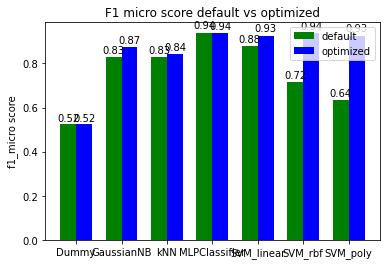

In [ ]:
N = 7
f1_default = list(f1_micro_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, f1_default, width, color='g')

f1_optimized = list(f1_micro_optimized.values())

rects2 = ax.bar(ind + width, f1_optimized, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('f1_micro score')
ax.set_title('F1 micro score default vs optimized')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(f1_micro_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.2f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

##### Comments

Σε κάθε ταξινομητή βλέπουμε μια καλού επιπέδου βελτίωση σε σχέση με το baseline classification. Φυσικά, οι ταξινομητές που είχαν ήδη ένα καλό επίπεδο ακρίβειας, βελτιώνονται λιγότερα, όπως είναι λογικό.

- ο GaussianNB βελτιώθηκε ελάχιστα σε σχέση με πριν.
- ο MLP παρέμεινε σταθερός
- ο kNN βελτιώθηκε κατά λίγο
- ο SVM με linear kernel είχε καλή επίδοση πριν, και βελτιώθηκε λίγο
- ο SVM με rbf kernel είχε μέτρια επίδοση και βελτιώθκε πολύ
- ο SVM με polynomial kernel είχε μέτρια προς κακή επίδοση και είχε την μεγαλύτερη βελτίωση από όλους.

Καλύτερη απόδοση από όλους είχε ο MLP και ο SVM με RBF kernel.

Στους πιο πολλούς ταξινομητές ο scaler φαίνεται να είχε σημαντική συνεισφορά στην βελτίωση της ακρίβειας. Αυτό πιθανότατα συμβαίνει γιατί τα δεδομένα μας είναι πολύ συμπυκνωμένα σε μια περιοχή και κάνοντας τους κανονικοποίηση, βοηθάει την εκπαίδευση του classifier.

Εν αντιθέση, ο random oversampler στους πιο πολλούς δεν είχε καθόλου καλό αποτέλεσμα. Μάλιστα, σε κάποιους η απόδοση έπεσε. Πιθανόν γιατί γίνεται overfitting κάνοντας oversampling.

Η μέθοδος pca βελτίωσε την απόδοση κατά περιπτώσεις.. Σχεδόν οι μισοί ταξινομητές επωφελήθηκαν από τη χρηση της.

Όσον αφορά τον selector (VarianceThreshold) παρόλο που βάλαμε χαμηλές τιμες ως όριο, δεν είχε την απαραίτητη απόδοση. Περιμέναμε δηλαδή οι τιμές που έχουν μικρή διασπορά να μπερδεύουν τον classifier. Πιθανότατα αυτός ήταν ο λόγος που είχε τόσο μεγάλη επίδραση ο scaler. Επειδή είχαμε λίγα features και ήταν όλα κρίσιμη πληροφορία, μόλις τα ξεχωρίζαμε με κανονικοποίηση, είχε μεγάλη διαφορά.



Κοιτώντας έρευνες πάνω στο ίδιο dataset:

- [Adaptive Approach for Spam Detection ](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.412.2911&rep=rep1&type=pdf)
- [Spam Detection Using Feature Selection and Parameters Optimization](https://sci-hub.se/https://ieeexplore.ieee.org/abstract/document/5447486)

μπορούμε να πούμε πως πετυχαίνουμε παρόμοια ποσοστά.